In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/lof/data-lof-2024-05-13.csv")
df = pd.read_csv("data/inc/data-inc-2024-05-21.csv")

In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147079 entries, 0 to 147078
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        147079 non-null  int64  
 1   id_mls                    147079 non-null  object 
 2   bathrooms_total           147079 non-null  float64
 3   bedrooms_extra            147079 non-null  float64
 4   bedrooms                  147079 non-null  float64
 5   stories_total             147079 non-null  float64
 6   size_interior             147079 non-null  float64
 7   building_type             147079 non-null  object 
 8   agency_name               147079 non-null  object 
 9   agency_type               147079 non-null  object 
 10  property_type             147079 non-null  object 
 11  lng                       147079 non-null  float64
 12  lat                       147079 non-null  float64
 13  ownership_type            147079 non-null  o

# First Glance

In [4]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26917193,24011585,2,2 + 0,NaN,1181.0000,Apartment,EXP REALTY,Firm,Single Family,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26917193/1740-s...,638518108503430000,N9J1X7,Ontario,609900.0
1,26917150,24011582,3,4 + 0,2.0,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.272098,Freehold,1,78.31X110.47 FT,0,https://realtor.ca/real-estate/26917150/2768-l...,638518072592900000,N9E2L2,Ontario,749800.0
2,26916981,24011579,2,2 + 1,1.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.265487,Freehold,1,60.24X112.26,0,https://realtor.ca/real-estate/26916981/3291-m...,638517778522030000,N9E1Y6,Ontario,599900.0
3,26915862,24011568,3,2 + 1,1.0,1139.0000,Row / Townhouse,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.240381,Freehold,1,38.71X125',0,https://realtor.ca/real-estate/26915862/546-ro...,638516668488530000,N9G2W1,Ontario,399900.0
4,26915403,24011560,3,3 + 2,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,Single Family,...,42.100443,Freehold,1,54.99X200.98,0,https://realtor.ca/real-estate/26915403/7-mart...,638516524546900000,N9V4B7,Ontario,899900.0


In [5]:
df.shape

(26997, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26997 entries, 0 to 26996
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        26997 non-null  int64  
 1   id_mls                    26997 non-null  object 
 2   bathrooms_total           26997 non-null  int64  
 3   bedrooms                  26997 non-null  object 
 4   stories_total             17764 non-null  float64
 5   size_interior             14477 non-null  object 
 6   building_type             26997 non-null  object 
 7   agency_name               26997 non-null  object 
 8   agency_type               26997 non-null  object 
 9   property_type             26997 non-null  object 
 10  lng                       26997 non-null  float64
 11  lat                       26997 non-null  float64
 12  ownership_type            26997 non-null  object 
 13  ownership_type_group_ids  26997 non-null  object 
 14  land_s

In [7]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26917193,24011585,2,2 + 0,NaN,1181.0000,Apartment,EXP REALTY,Firm,Single Family,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26917193/1740-s...,638518108503430000,N9J1X7,Ontario,609900.0
3,26915862,24011568,3,2 + 1,1.0,1139.0000,Row / Townhouse,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.240381,Freehold,1,38.71X125',0,https://realtor.ca/real-estate/26915862/546-ro...,638516668488530000,N9G2W1,Ontario,399900.0
8,26912635,24011538,2,2 + 0,NaN,1280.0000,Apartment,SOTHEBY'S INTERNATIONAL REALTY CANADA,Firm,Single Family,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26912635/1225-r...,638515768699430000,N9A0A2,Ontario,589900.0
11,26911605,24011480,2,3 + 0,NaN,1440.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,Single Family,...,42.135470,Freehold,1,76.61X167.39 FT APPROX,0,https://realtor.ca/real-estate/26911605/38-kin...,638515696791100000,N9V4A4,Ontario,701900.0
12,26911606,24011478,2,3 + 0,NaN,1350.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,Single Family,...,42.135738,Freehold,1,62.43X146.36 approx,0,https://realtor.ca/real-estate/26911606/26-kin...,638515696794000000,N9V4A4,Ontario,669900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26992,26886713,5805,2,3,NaN,1647 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.446156,none,none,7888,0,https://realtor.ca/real-estate/26886713/6157-f...,638512242112370000,NaN,Northwest Territories,689900.0
26993,26884633,5804,2,2,NaN,1395 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.436308,none,none,4572,0,https://realtor.ca/real-estate/26884633/15-hor...,638512089573500000,X1A3E3,Northwest Territories,414900.0
26994,26913438,5814,1,1,NaN,434 sqft,Recreational,CENTURY 21 Prospect Realty,Firm,Recreational,...,62.553661,none,none,38596,0,https://realtor.ca/real-estate/26913438/14-pre...,638515833507430000,NaN,Northwest Territories,305000.0
26995,26905047,5813,2,3,NaN,1680 sqft,Manufactured Home,COLDWELL BANKER NBS,Firm,Single Family,...,62.567172,none,none,15000,0,https://realtor.ca/real-estate/26905047/14-pre...,638514813538100000,NaN,Northwest Territories,695000.0


In [8]:
df_with_size["province"].value_counts()

province
British Columbia           4190
Ontario                    3775
Alberta                    2960
Quebec                     1676
Saskatchewan                690
Manitoba                    635
New Brunswick               380
Newfoundland & Labrador     143
Yukon                        18
Northwest Territories        10
Name: count, dtype: int64

In [9]:
df["province"].value_counts()

province
Ontario                    12378
British Columbia            4547
Quebec                      3921
Alberta                     3148
Saskatchewan                 807
Manitoba                     708
Nova Scotia                  598
New Brunswick                487
Newfoundland & Labrador      191
Prince Edward Island         183
Yukon                         19
Northwest Territories         10
Name: count, dtype: int64

In [10]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,26997.0,26997.0,17764.0,26997.0,26997.0,26997.0,2.699700e+04,26997.0
mean,26900921.0,2.0,2.0,-90.0,47.0,3.0,6.385143e+17,875492.0
std,9987.0,1.0,3.0,20.0,3.0,4.0,1.579632e+12,1035889.0
min,26883229.0,0.0,0.0,-139.0,42.0,0.0,6.385112e+17,1.0
25%,26892297.0,1.0,1.0,-114.0,44.0,0.0,6.385131e+17,414900.0
50%,26901052.0,2.0,2.0,-80.0,46.0,1.0,6.385142e+17,650000.0
75%,26909536.0,3.0,2.0,-77.0,49.0,4.0,6.385156e+17,999000.0
max,26918278.0,20.0,159.0,-53.0,64.0,110.0,6.385187e+17,28500000.0


# Remove Duplicates

In [11]:
len(df["id"].unique())

26987

In [12]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

20


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
7590,26883960,C8331416,1,1,NaN,NaN,Apartment,THE AGENCY,Firm,Single Family,...,43.656981,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26883960/624-51...,638511746399170000,M5A0E9,Ontario,535000.0
7589,26883960,C8331416,1,1,NaN,NaN,Apartment,THE AGENCY,Firm,Single Family,...,43.656981,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26883960/624-51...,638511746399170000,M5A0E9,Ontario,535000.0
7390,26885136,X8331936,3,2,NaN,NaN,Row / Townhouse,SEARCH REALTY,Firm,Single Family,...,43.102170,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26885136/104-67...,638512113180970000,L2E5J8,Ontario,749999.0
7388,26885136,X8331936,3,2,NaN,NaN,Row / Townhouse,SEARCH REALTY,Firm,Single Family,...,43.102170,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26885136/104-67...,638512113180970000,L2E5J8,Ontario,749999.0
7190,26886961,C8333712,2,2,NaN,NaN,Apartment,HARVEY KALLES REAL ESTATE LTD.,Firm,Single Family,...,43.710833,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26886961/202-56...,638512252056870000,M4P1P1,Ontario,818000.0
7189,26886961,C8333712,2,2,NaN,NaN,Apartment,HARVEY KALLES REAL ESTATE LTD.,Firm,Single Family,...,43.710833,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26886961/202-56...,638512252056870000,M4P1P1,Ontario,818000.0
6988,26888049,W8334478,2,2,NaN,NaN,Apartment,CENTURY 21 KING'S QUAY REAL ESTATE INC.,Firm,Single Family,...,43.621072,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26888049/2904-2...,638512325665130000,M8V0A9,Ontario,869900.0
6990,26888049,W8334478,2,2,NaN,NaN,Apartment,CENTURY 21 KING'S QUAY REAL ESTATE INC.,Firm,Single Family,...,43.621072,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26888049/2904-2...,638512325665130000,M8V0A9,Ontario,869900.0
20393,26888807,R2882364,1,1,NaN,606 sqft,Apartment,YVR International Realty,Firm,Single Family,...,49.262694,Strata,2,0,1,https://realtor.ca/real-estate/26888807/2508-5...,638512411474930000,V3J0E8,British Columbia,658888.0
20395,26888807,R2882364,1,1,NaN,606 sqft,Apartment,YVR International Realty,Firm,Single Family,...,49.262694,Strata,2,0,1,https://realtor.ca/real-estate/26888807/2508-5...,638512411474930000,V3J0E8,British Columbia,658888.0


In [13]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
7590,26883960,C8331416,1,1,NaN,NaN,Apartment,THE AGENCY,Firm,Single Family,...,43.656981,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26883960/624-51...,638511746399170000,M5A0E9,Ontario,535000.0
7390,26885136,X8331936,3,2,NaN,NaN,Row / Townhouse,SEARCH REALTY,Firm,Single Family,...,43.102170,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26885136/104-67...,638512113180970000,L2E5J8,Ontario,749999.0
7190,26886961,C8333712,2,2,NaN,NaN,Apartment,HARVEY KALLES REAL ESTATE LTD.,Firm,Single Family,...,43.710833,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26886961/202-56...,638512252056870000,M4P1P1,Ontario,818000.0
6990,26888049,W8334478,2,2,NaN,NaN,Apartment,CENTURY 21 KING'S QUAY REAL ESTATE INC.,Firm,Single Family,...,43.621072,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26888049/2904-2...,638512325665130000,M8V0A9,Ontario,869900.0
20395,26888807,R2882364,1,1,NaN,606 sqft,Apartment,YVR International Realty,Firm,Single Family,...,49.262694,Strata,2,0,1,https://realtor.ca/real-estate/26888807/2508-5...,638512411474930000,V3J0E8,British Columbia,658888.0
19142,26889220,R2882507,1,1,NaN,643 sqft,Apartment,RE/MAX Masters Realty,Firm,Single Family,...,49.262135,Strata,2,0,1,https://realtor.ca/real-estate/26889220/412-10...,638512483450100000,V5T4N7,British Columbia,649900.0
6590,26891101,X8336090,1,2,1.5,NaN,House,REALTY NETWORK,Firm,Single Family,...,43.238194,Freehold,1,35.67 x 75 FT,0,https://realtor.ca/real-estate/26891101/8-east...,638512976502200000,L8V3N7,Ontario,599900.0
5790,26897065,W8339776,4,4,2.0,NaN,House,RE/MAX EXPERTS,Firm,Single Family,...,43.670380,Freehold,1,37.15 x 105.18 FT,6,https://realtor.ca/real-estate/26897065/92-sti...,638513844255730000,L6X0T1,Ontario,1349000.0
15920,26904309,20537285,2,4,1.0,NaN,House,PROPRIO DIRECT,Firm,Single Family,...,46.000005,none,none,1502.8 m2,10,https://realtor.ca/real-estate/26904309/1456-p...,638514763601000000,J0K2T0,Quebec,549000.0
1981,26905783,X8346068,4,4,2.0,NaN,House,VALUE INSIGHT REALTY INC.,Firm,Single Family,...,43.429038,none,none,196 x 328 FT ; 196.77 Frontage X 1.52 Acres|...,13,https://realtor.ca/real-estate/26905783/166-ca...,638514848613430000,L0P1B0,Ontario,2980000.0


In [14]:
df = df.drop_duplicates(subset="id", keep=False)

In [15]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [16]:
# df = df.drop(["id", "id_mls"], axis=1)

In [17]:
df.shape

(26977, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26977 entries, 0 to 26996
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        26977 non-null  int64  
 1   id_mls                    26977 non-null  object 
 2   bathrooms_total           26977 non-null  int64  
 3   bedrooms                  26977 non-null  object 
 4   stories_total             17756 non-null  float64
 5   size_interior             14473 non-null  object 
 6   building_type             26977 non-null  object 
 7   agency_name               26977 non-null  object 
 8   agency_type               26977 non-null  object 
 9   property_type             26977 non-null  object 
 10  lng                       26977 non-null  float64
 11  lat                       26977 non-null  float64
 12  ownership_type            26977 non-null  object 
 13  ownership_type_group_ids  26977 non-null  object 
 14  land_size  

In [19]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  15409
none                       4414
Condominium/Strata         4186
Strata                     1863
Condominium                 606
Leasehold                   242
Freehold Condo               84
Leasehold Condo/Strata       63
Undivided Co-ownership       42
Shares in Co-operative       17
Unknown                      15
Other, See Remarks           14
Timeshare/Fractional          9
Leasehold/Leased Land         7
Cooperative                   3
Life Lease                    3
Name: count, dtype: int64

In [20]:
df["building_type"].value_counts()

building_type
House                         15342
Apartment                      4829
Row / Townhouse                2584
none                           2235
Duplex                          660
Mobile Home                     230
Triplex                         173
No Building                     153
Multi-Family                    150
Unknown                         118
Other                           111
Recreational                    105
Fourplex                         99
Manufactured Home                72
Manufactured Home/Mobile         72
Modular                          23
Commercial Mix                    8
Two Apartment House               7
Parking                           5
Residential Commercial Mix        1
Name: count, dtype: int64

In [21]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold                  64
none                      30
Condominium/Strata         8
Strata                     7
Freehold Condo             1
Shares in Co-operative     1
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [23]:
df["property_type"].value_counts()

property_type
Single Family    24264
Vacant Land       2078
Multi-family       391
Recreational       121
Agriculture        118
Parking              5
Name: count, dtype: int64

In [24]:
df[df["property_type"] == "Business"]["page_url"]

Series([], Name: page_url, dtype: object)

In [25]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [26]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [27]:
df_sf = df[df["property_type"] == "Single Family"]

In [28]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24264 entries, 0 to 26996
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        24264 non-null  int64  
 1   id_mls                    24264 non-null  object 
 2   bathrooms_total           24264 non-null  int64  
 3   bedrooms                  24264 non-null  object 
 4   stories_total             17363 non-null  float64
 5   size_interior             14079 non-null  object 
 6   building_type             24264 non-null  object 
 7   agency_name               24264 non-null  object 
 8   agency_type               24264 non-null  object 
 9   property_type             24264 non-null  object 
 10  lng                       24264 non-null  float64
 11  lat                       24264 non-null  float64
 12  ownership_type            24264 non-null  object 
 13  ownership_type_group_ids  24264 non-null  object 
 14  land_size  

In [29]:
df_sf["province"].value_counts()

province
Ontario                    11445
British Columbia            4138
Quebec                      3411
Alberta                     2920
Saskatchewan                 688
Manitoba                     635
Nova Scotia                  428
New Brunswick                360
Newfoundland & Labrador      126
Prince Edward Island          86
Yukon                         18
Northwest Territories          9
Name: count, dtype: int64

In [30]:
df_sf["building_type"].value_counts()

building_type
House                       15320
Apartment                    4822
Row / Townhouse              2580
Duplex                        574
none                          302
Mobile Home                   230
Triplex                       134
Manufactured Home/Mobile       72
Manufactured Home              69
Fourplex                       67
Recreational                   50
Modular                        23
Other                          14
Two Apartment House             7
Name: count, dtype: int64

In [31]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  14018
Condominium/Strata         4161
none                       3179
Strata                     1825
Condominium                 606
Leasehold                   230
Freehold Condo               84
Leasehold Condo/Strata       62
Undivided Co-ownership       42
Shares in Co-operative       15
Other, See Remarks           12
Unknown                      10
Timeshare/Fractional          7
Leasehold/Leased Land         7
Cooperative                   3
Life Lease                    3
Name: count, dtype: int64

In [32]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
42,26903449,X8344618,2,3 + 2,2.0,NaN,Duplex,HOUSEEO REALTY,Firm,Single Family,...,42.318113,none,none,30.11 x 109.88 FT|under 1/2 acre,0,https://realtor.ca/real-estate/26903449/1171-a...,638514706139570000,N8Y3P5,Ontario,450000.0
191,26909235,24011483,1,3 + 0,1.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.147147,none,none,0X,0,https://realtor.ca/real-estate/26909235/20-pop...,638515552813400000,N0R1J0,Ontario,199200.0
221,26904217,24011438,2,2 + 0,1.0,NaN,Row / Townhouse,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.261812,none,none,38X,0,https://realtor.ca/real-estate/26904217/506-li...,638514760744300000,N6E3N7,Ontario,799900.0
346,26892134,X8336610,3,3,2.0,NaN,Triplex,"STREETCITY REALTY INC., BROKERAGE",Firm,Single Family,...,42.590176,none,none,66 x 99 FT,6,https://realtor.ca/real-estate/26892134/398-br...,638513049000930000,N0P1M0,Ontario,299000.0
525,26911033,X8349638,4,4,1.0,NaN,House,"SUTTON GROUP - SELECT REALTY INC., BROKERAGE",Firm,Single Family,...,42.877252,none,none,295 x 278 FT|1/2 - 1.99 acres,13,https://realtor.ca/real-estate/26911033/7125-c...,638515641673300000,N0L1T0,Ontario,1089000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26991,26897933,5808,1,1,NaN,160 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.451183,none,none,160,0,https://realtor.ca/real-estate/26897933/tiny-h...,638513898241370000,NaN,Northwest Territories,65000.0
26992,26886713,5805,2,3,NaN,1647 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.446156,none,none,7888,0,https://realtor.ca/real-estate/26886713/6157-f...,638512242112370000,NaN,Northwest Territories,689900.0
26993,26884633,5804,2,2,NaN,1395 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.436308,none,none,4572,0,https://realtor.ca/real-estate/26884633/15-hor...,638512089573500000,X1A3E3,Northwest Territories,414900.0
26995,26905047,5813,2,3,NaN,1680 sqft,Manufactured Home,COLDWELL BANKER NBS,Firm,Single Family,...,62.567172,none,none,15000,0,https://realtor.ca/real-estate/26905047/14-pre...,638514813538100000,NaN,Northwest Territories,695000.0


In [33]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

42       https://realtor.ca/real-estate/26903449/1171-a...
191      https://realtor.ca/real-estate/26909235/20-pop...
221      https://realtor.ca/real-estate/26904217/506-li...
346      https://realtor.ca/real-estate/26892134/398-br...
525      https://realtor.ca/real-estate/26911033/7125-c...
                               ...                        
26991    https://realtor.ca/real-estate/26897933/tiny-h...
26992    https://realtor.ca/real-estate/26886713/6157-f...
26993    https://realtor.ca/real-estate/26884633/15-hor...
26995    https://realtor.ca/real-estate/26905047/14-pre...
26996    https://realtor.ca/real-estate/26895561/1424-5...
Name: page_url, Length: 3179, dtype: object

In [34]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

130      https://realtor.ca/real-estate/26918158/5600-b...
1336     https://realtor.ca/real-estate/26911521/202-ch...
1339     https://realtor.ca/real-estate/26911317/54-che...
1349     https://realtor.ca/real-estate/26910199/17-sio...
1374     https://realtor.ca/real-estate/26908217/2002-a...
1389     https://realtor.ca/real-estate/26905334/77683-...
1483     https://realtor.ca/real-estate/26893654/21-riv...
1500     https://realtor.ca/real-estate/26891642/82883-...
1510     https://realtor.ca/real-estate/26891172/77683-...
1577     https://realtor.ca/real-estate/26884037/9338-w...
1580     https://realtor.ca/real-estate/26883832/131-su...
1688     https://realtor.ca/real-estate/26915084/99-fou...
1891     https://realtor.ca/real-estate/26908779/118-pa...
1894     https://realtor.ca/real-estate/26908649/5-pine...
2297     https://realtor.ca/real-estate/26897287/54-lak...
2740     https://realtor.ca/real-estate/26884154/118-ma...
7080     https://realtor.ca/real-estate/26887727/1501-l.

In [35]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,
Alberta,497,230,5,1737,9,49,32,0,0,9,351,1,0,0
British Columbia,1232,112,3,2107,56,21,17,0,0,11,565,1,0,13
Manitoba,57,17,0,525,0,0,14,0,2,0,20,0,0,0
New Brunswick,3,0,0,334,0,0,11,0,0,0,7,0,0,5
Newfoundland & Labrador,0,0,0,118,0,0,0,0,0,0,0,0,7,1
Northwest Territories,1,0,0,5,2,0,1,0,0,0,0,0,0,0
Nova Scotia,14,2,0,363,0,0,12,0,0,28,8,0,0,1
Ontario,2116,43,6,7383,1,0,79,21,12,1,1524,17,0,242
Prince Edward Island,4,3,0,74,0,0,4,0,0,0,1,0,0,0


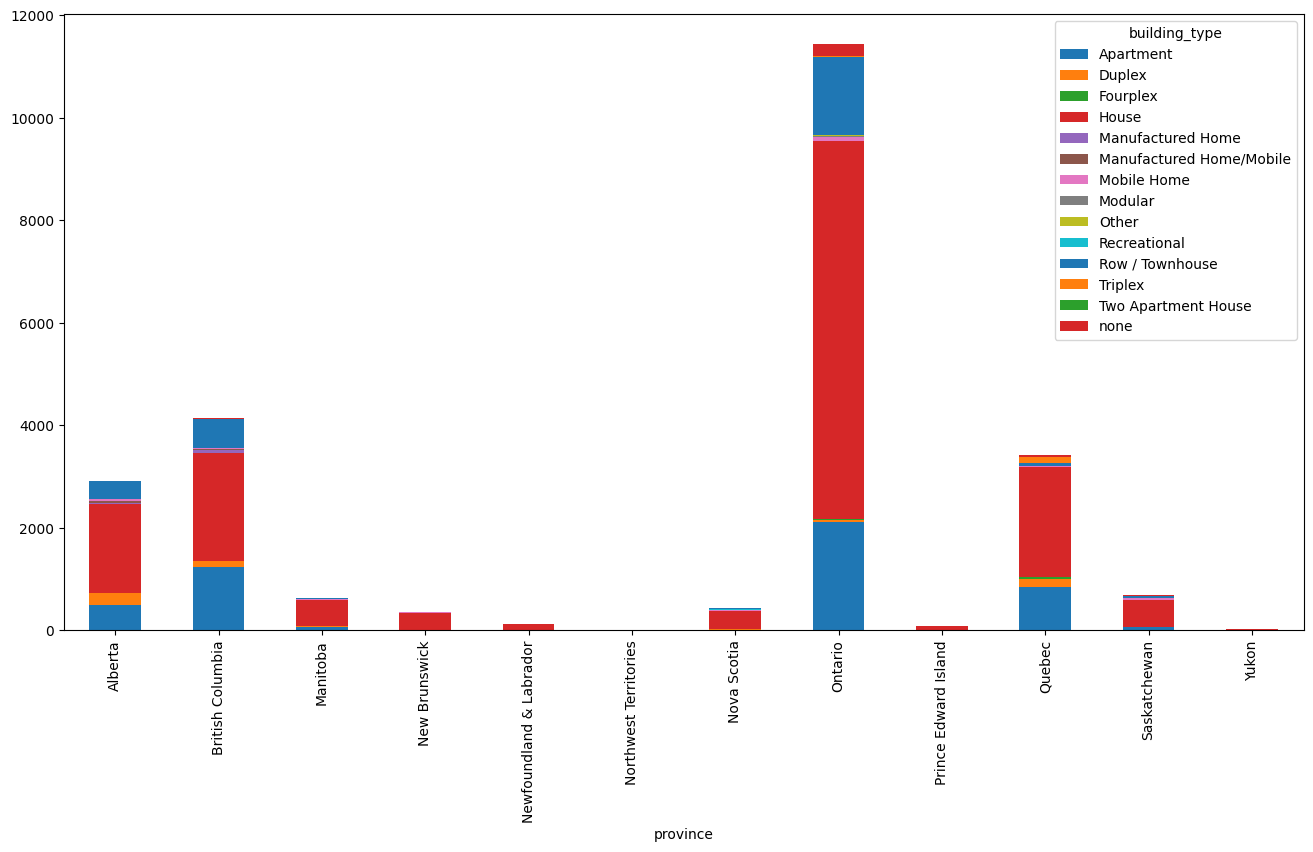

In [36]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

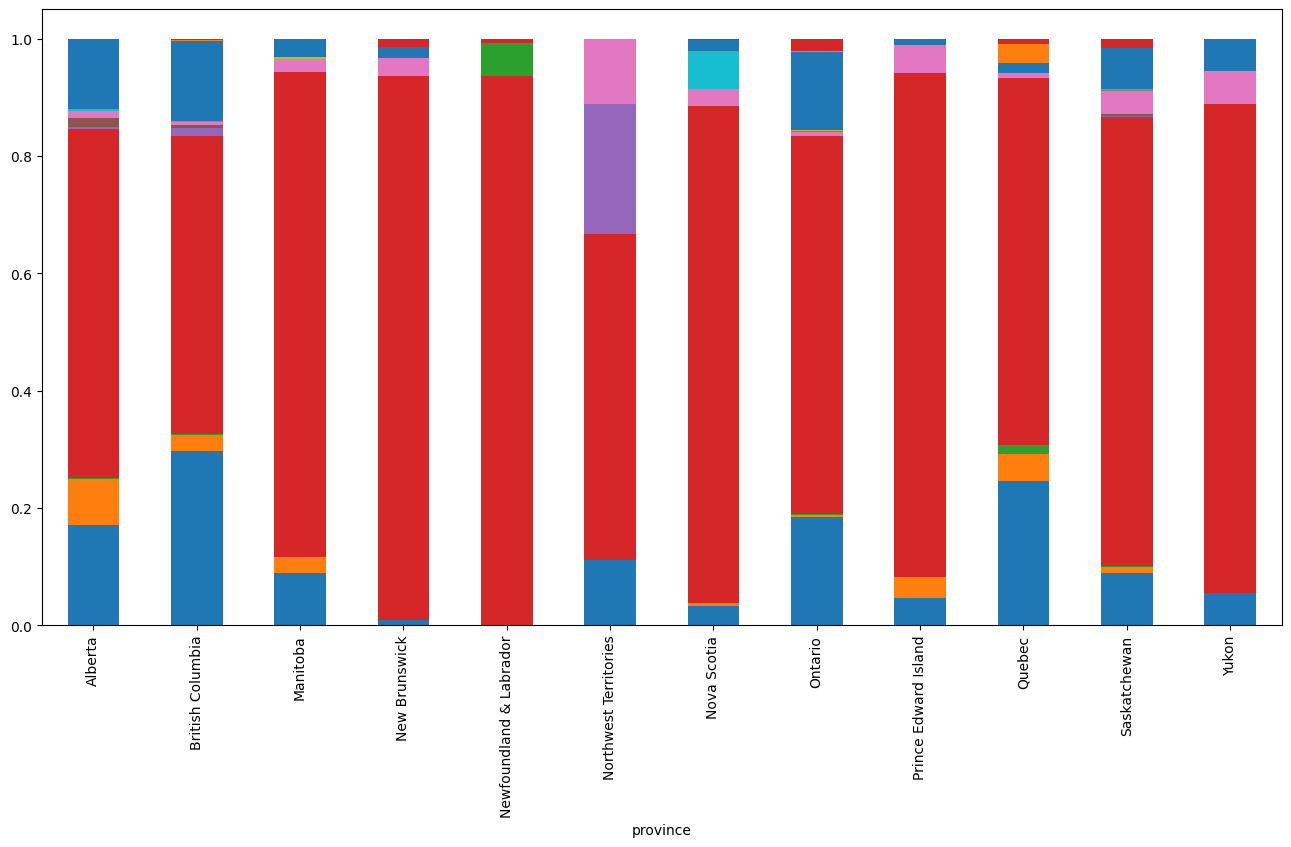

In [37]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [38]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,842,0,1923,0,18,0,0,0,0,0,0,0,0,0,137
British Columbia,0,44,0,2076,0,57,60,7,0,8,10,1825,4,0,7,40
Manitoba,0,1,0,532,84,16,0,0,1,0,0,0,0,0,1,0
New Brunswick,0,12,0,237,0,15,0,0,0,0,0,0,0,0,0,96
Newfoundland & Labrador,1,0,0,122,0,2,0,0,0,0,0,0,0,0,0,1
Northwest Territories,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,7
Nova Scotia,0,19,0,399,0,9,0,0,0,0,0,0,0,0,1,0
Ontario,605,2250,3,8098,0,89,2,0,2,4,5,0,3,3,0,381
Prince Edward Island,0,4,0,79,0,2,0,0,0,0,0,0,0,0,1,0


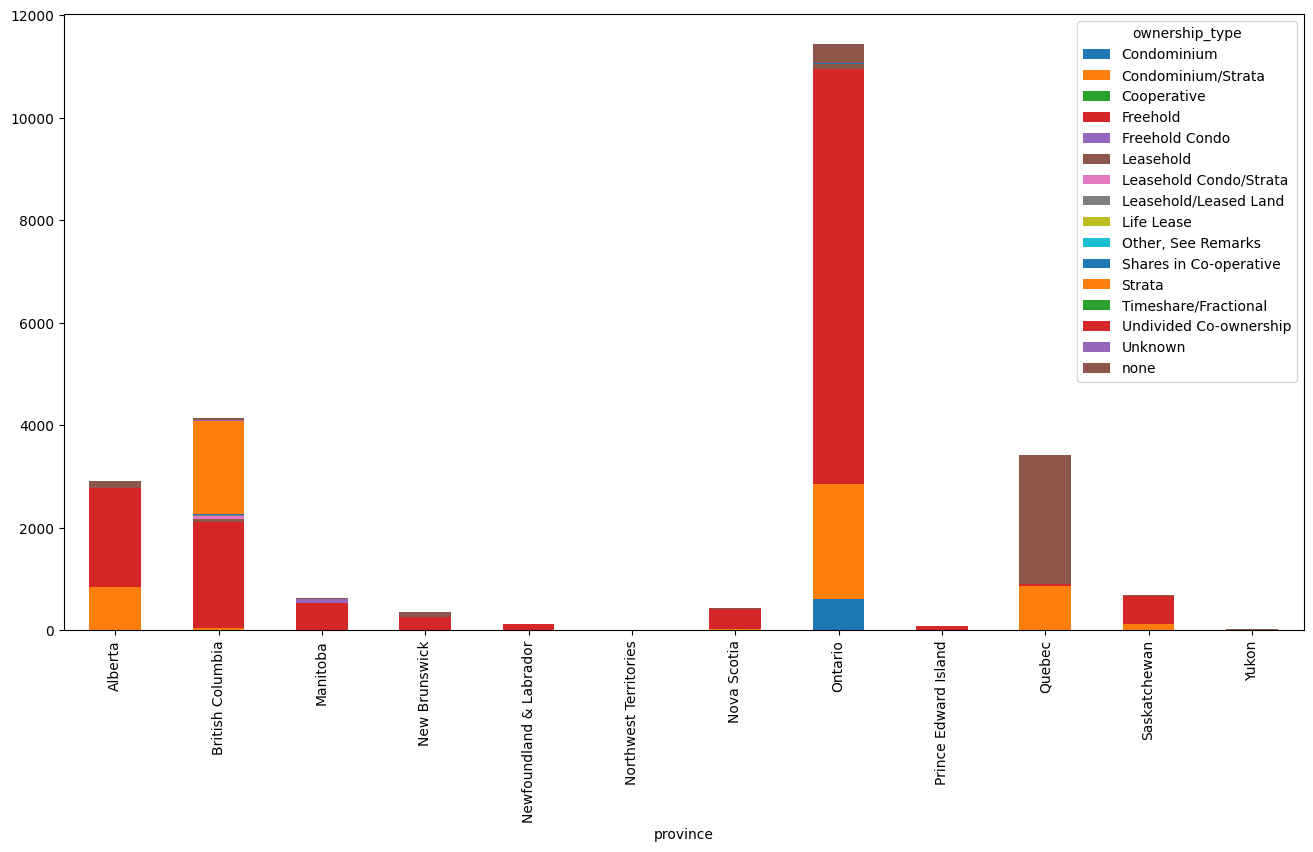

In [39]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

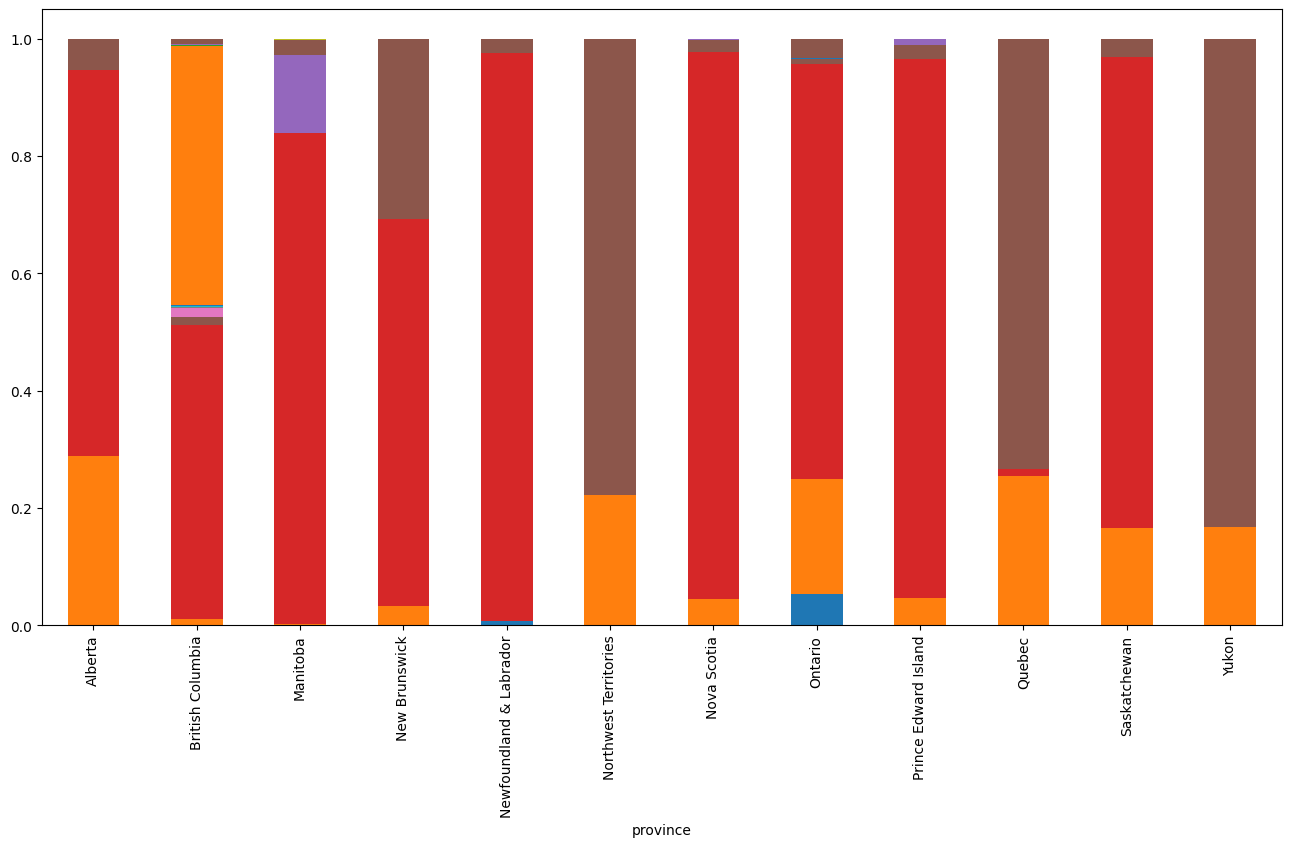

In [40]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [41]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        3113
Strata                    1118
Condominium                387
Freehold Condo              55
Leasehold Condo/Strata      52
Undivided Co-ownership      42
Freehold                    21
Shares in Co-operative      13
Leasehold                    7
none                         5
Timeshare/Fractional         4
Life Lease                   2
Cooperative                  1
Unknown                      1
Other, See Remarks           1
Name: count, dtype: int64

In [42]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold                 283
none                     196
Strata                    56
Condominium/Strata        36
Unknown                    1
Leasehold/Leased Land      1
Leasehold                  1
Name: count, dtype: int64

In [43]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,
Condominium,387,0,0,17,0,0,0,1,0,0,196,0,0,5
Condominium/Strata,3113,36,2,77,0,11,1,1,8,2,883,0,0,27
Cooperative,1,0,0,2,0,0,0,0,0,0,0,0,0,0
Freehold,21,283,8,12560,14,50,46,4,2,38,938,2,7,45
Freehold Condo,55,0,0,11,0,0,0,0,1,0,17,0,0,0
Leasehold,7,1,0,73,23,8,90,17,0,1,2,0,0,8
Leasehold Condo/Strata,52,0,0,1,0,0,0,0,0,0,8,0,0,1
Leasehold/Leased Land,0,1,0,4,1,0,0,0,0,0,1,0,0,0
Life Lease,2,0,0,0,0,0,0,0,0,0,1,0,0,0


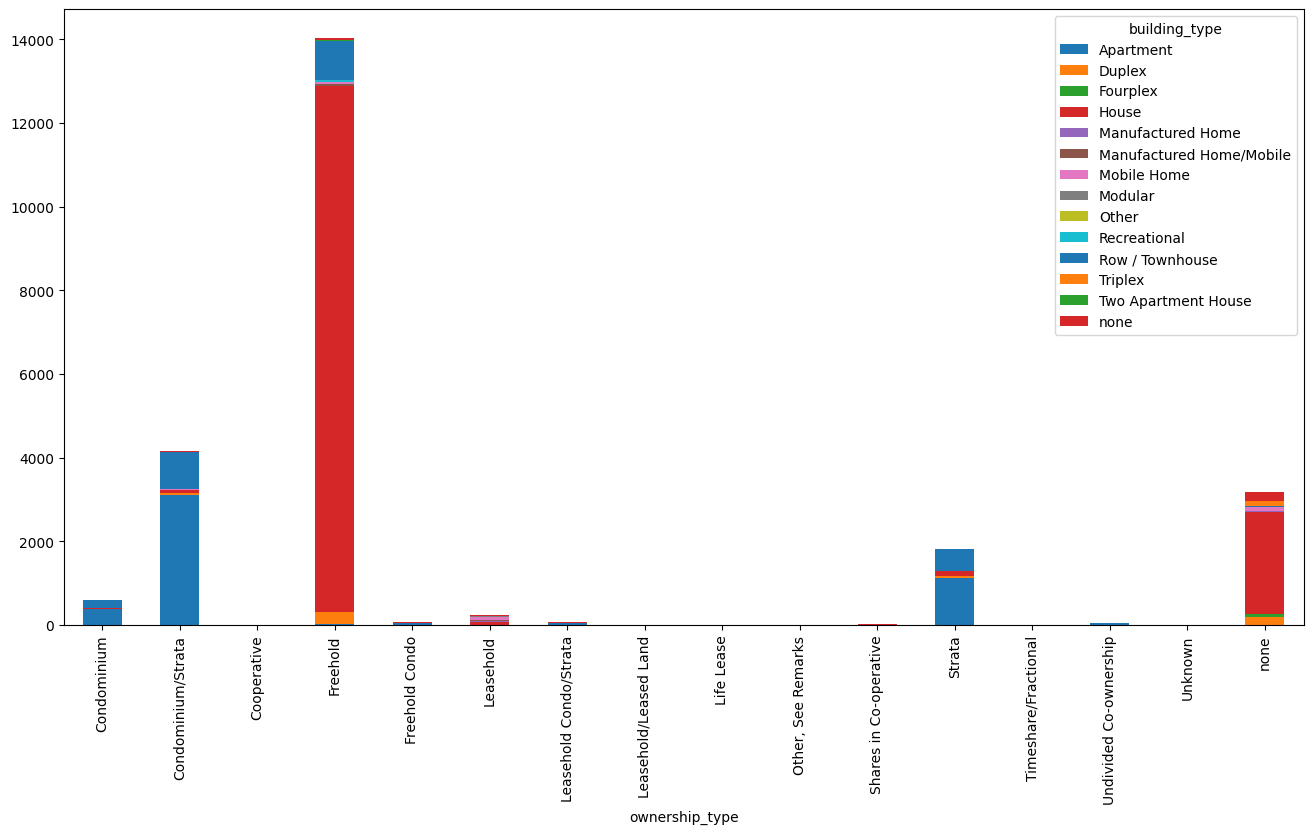

In [44]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

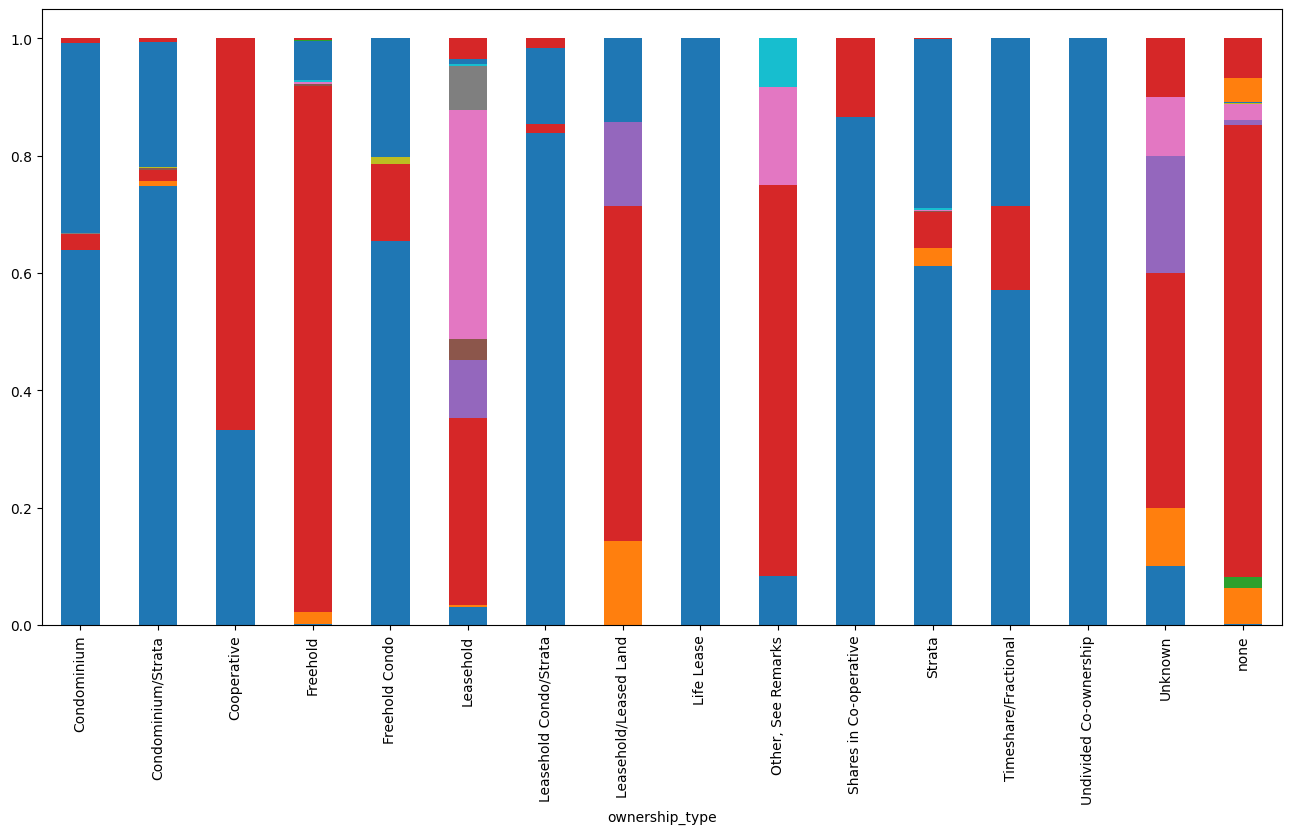

In [45]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [46]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,574.0,574.0,341.0,574.0,574.0,574.0,5.740000e+02,574.0
mean,26901458.0,2.0,2.0,-101.0,49.0,2.0,6.385144e+17,738757.0
std,9761.0,1.0,0.0,20.0,3.0,2.0,1.582090e+12,611792.0
min,26883320.0,0.0,1.0,-125.0,42.0,0.0,6.385113e+17,69900.0
25%,26894076.0,2.0,2.0,-114.0,46.0,0.0,6.385132e+17,381250.0
50%,26901520.0,2.0,2.0,-113.0,50.0,2.0,6.385143e+17,559888.0
75%,26909332.0,3.0,2.0,-74.0,52.0,4.0,6.385156e+17,872499.0
max,26918277.0,7.0,3.0,-63.0,57.0,16.0,6.385187e+17,8498000.0


In [47]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,134.0,134.0,72.0,134.0,134.0,134.0,1.340000e+02,134.0
mean,26902176.0,1.0,2.0,-75.0,46.0,3.0,6.385146e+17,879199.0
std,10696.0,1.0,1.0,6.0,1.0,3.0,1.846921e+12,449290.0
min,26883712.0,1.0,1.0,-119.0,43.0,0.0,6.385115e+17,259900.0
25%,26892558.0,1.0,2.0,-74.0,45.0,0.0,6.385131e+17,592175.0
50%,26901474.0,1.0,2.0,-74.0,46.0,3.0,6.385142e+17,799900.0
75%,26910901.0,1.0,3.0,-73.0,46.0,6.0,6.385156e+17,999675.0
max,26918262.0,7.0,3.0,-71.0,53.0,12.0,6.385187e+17,3350000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,67.0,67.0,33.0,67.0,67.0,67.0,6.700000e+01,67.0
mean,26899779.0,2.0,2.0,-80.0,47.0,4.0,6.385142e+17,925856.0
std,11719.0,1.0,1.0,15.0,2.0,4.0,1.891573e+12,515649.0
min,26883518.0,0.0,1.0,-123.0,43.0,0.0,6.385114e+17,119900.0
25%,26889120.0,1.0,2.0,-76.0,46.0,0.0,6.385125e+17,554975.0
50%,26900118.0,1.0,2.0,-74.0,46.0,3.0,6.385141e+17,900000.0
75%,26911940.0,2.0,2.0,-73.0,47.0,6.0,6.385157e+17,1162000.0
max,26917627.0,6.0,4.0,-65.0,54.0,12.0,6.385183e+17,3095000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2580.0,2580.0,1910.0,2580.0,2580.0,2580.0,2.580000e+03,2580.0
mean,26900896.0,3.0,2.0,-94.0,46.0,2.0,6.385143e+17,748167.0
std,9945.0,1.0,1.0,19.0,3.0,1.0,1.563619e+12,368631.0
min,26883229.0,0.0,1.0,-135.0,42.0,0.0,6.385112e+17,2950.0
25%,26892587.0,2.0,2.0,-114.0,44.0,1.0,6.385131e+17,519900.0
50%,26900748.0,3.0,2.0,-80.0,44.0,2.0,6.385141e+17,699000.0
75%,26909665.0,3.0,3.0,-79.0,49.0,2.0,6.385156e+17,899000.0
max,26918274.0,6.0,6.0,-63.0,61.0,16.0,6.385187e+17,4300000.0


In [50]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       15320
Apartment                    4822
Row / Townhouse              2580
Semi-Detached                 775
none                          302
Mobile Home                   230
Manufactured Home/Mobile       72
Manufactured Home              69
Recreational                   50
Modular                        23
Other                          14
Two Apartment House             7
Name: count, dtype: int64

In [51]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              15320
Apartment           4822
Row / Townhouse     2580
Semi-Detached        775
Name: count, dtype: int64

In [52]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23497 entries, 0 to 26996
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23497 non-null  int64  
 1   id_mls                    23497 non-null  object 
 2   bathrooms_total           23497 non-null  int64  
 3   bedrooms                  23497 non-null  object 
 4   stories_total             16857 non-null  float64
 5   size_interior             13529 non-null  object 
 6   building_type             23497 non-null  object 
 7   agency_name               23497 non-null  object 
 8   agency_type               23497 non-null  object 
 9   property_type             23497 non-null  object 
 10  lng                       23497 non-null  float64
 11  lat                       23497 non-null  float64
 12  ownership_type            23497 non-null  object 
 13  ownership_type_group_ids  23497 non-null  object 
 14  land_size  

In [53]:
df_bt["province"].value_counts()

province
Ontario                    11089
British Columbia            4020
Quebec                      3350
Alberta                     2821
Saskatchewan                 644
Manitoba                     619
Nova Scotia                  387
New Brunswick                344
Newfoundland & Labrador      118
Prince Edward Island          82
Yukon                         17
Northwest Territories          6
Name: count, dtype: int64

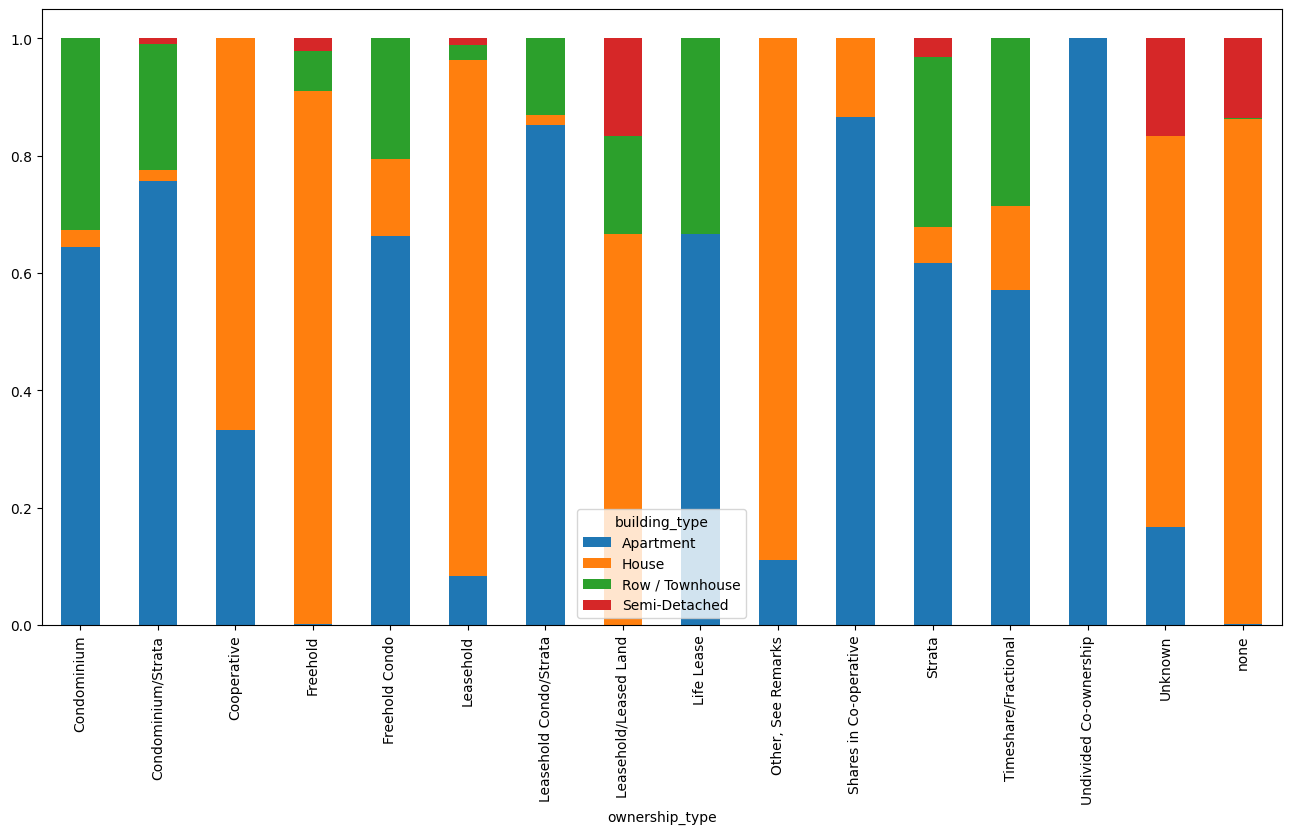

In [54]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [55]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          13812
2           6679
none        2859
4             89
1 2           42
3              7
1 2 3 4        6
2 3            3
Name: count, dtype: int64

In [56]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12560
none        2460
2            218
4             77
1 2 3 4        4
3              1
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          4738
1 2          42
1            21
none          7
4             7
3             4
2 3           2
1 2 3 4       1
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none       385
1          293
2           94
4            2
1 2 3 4      1
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       1629
1        938
none       7
4          3
3          2
2 3        1
Name: count, dtype: int64

In [60]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,13812.0,13812.0,11178.0,13812.0,13812.0,13812.0,1.381200e+04,13812.0
mean,26901092.0,3.0,2.0,-91.0,47.0,3.0,6.385144e+17,1056058.0
std,9808.0,1.0,1.0,19.0,4.0,4.0,1.535768e+12,1027099.0
min,26883229.0,0.0,1.0,-130.0,42.0,0.0,6.385112e+17,1.0
25%,26892621.0,2.0,1.0,-113.0,44.0,0.0,6.385131e+17,549900.0
50%,26901726.0,3.0,2.0,-80.0,45.0,3.0,6.385143e+17,799900.0
75%,26909592.0,4.0,2.0,-79.0,50.0,5.0,6.385156e+17,1249999.0
max,26918278.0,16.0,47.0,-53.0,59.0,100.0,6.385187e+17,25000000.0


In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2859.0,2859.0,2569.0,2859.0,2859.0,2859.0,2.859000e+03,2859.0
mean,26901599.0,2.0,2.0,-76.0,46.0,4.0,6.385145e+17,665740.0
std,10590.0,1.0,1.0,10.0,2.0,4.0,1.771245e+12,746285.0
min,26883294.0,0.0,1.0,-139.0,42.0,0.0,6.385113e+17,46875.0
25%,26892468.0,1.0,1.0,-74.0,45.0,2.0,6.385131e+17,374650.0
50%,26901366.0,2.0,2.0,-74.0,46.0,4.0,6.385142e+17,549500.0
75%,26911304.0,2.0,2.0,-73.0,46.0,6.0,6.385157e+17,798450.0
max,26918269.0,9.0,4.0,-59.0,64.0,110.0,6.385187e+17,21999999.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,7.0,7.0,2.0,7.0,7.0,7.0,7.000000e+00,7.0
mean,26898320.0,2.0,2.0,-105.0,47.0,0.0,6.385139e+17,98929.0
std,11157.0,1.0,1.0,24.0,3.0,0.0,1.560810e+12,96981.0
min,26884191.0,1.0,1.0,-124.0,43.0,0.0,6.385120e+17,21000.0
25%,26889199.0,1.0,1.0,-124.0,45.0,0.0,6.385125e+17,31000.0
50%,26897782.0,2.0,2.0,-123.0,48.0,0.0,6.385139e+17,84500.0
75%,26907647.0,3.0,2.0,-79.0,49.0,0.0,6.385152e+17,115000.0
max,26912575.0,4.0,2.0,-79.0,50.0,1.0,6.385158e+17,295000.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,89.0,89.0,62.0,89.0,89.0,89.0,8.900000e+01,89.0
mean,26900143.0,2.0,1.0,-94.0,48.0,1.0,6.385142e+17,430977.0
std,9430.0,1.0,0.0,20.0,4.0,1.0,1.394769e+12,304572.0
min,26883506.0,0.0,1.0,-124.0,42.0,0.0,6.385114e+17,45900.0
25%,26892518.0,1.0,1.0,-110.0,45.0,0.0,6.385131e+17,214900.0
50%,26899722.0,1.0,1.0,-83.0,49.0,0.0,6.385140e+17,370000.0
75%,26908282.0,2.0,1.0,-80.0,50.0,1.0,6.385152e+17,575000.0
max,26917701.0,5.0,2.0,-54.0,56.0,7.0,6.385183e+17,1849000.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,6.0,6.0,5.0,6.0,6.0,6.0,6.000000e+00,6.0
mean,26901092.0,2.0,2.0,-108.0,49.0,0.0,6.385143e+17,803800.0
std,10990.0,1.0,1.0,25.0,1.0,1.0,1.551604e+12,647788.0
min,26888479.0,1.0,1.0,-124.0,46.0,0.0,6.385124e+17,59900.0
25%,26893294.0,1.0,1.0,-123.0,49.0,0.0,6.385132e+17,301175.0
50%,26898706.0,2.0,1.0,-122.0,49.0,0.0,6.385140e+17,832000.0
75%,26910549.0,3.0,2.0,-103.0,50.0,0.0,6.385154e+17,1097250.0
max,26914674.0,4.0,3.0,-63.0,51.0,2.0,6.385163e+17,1789000.0


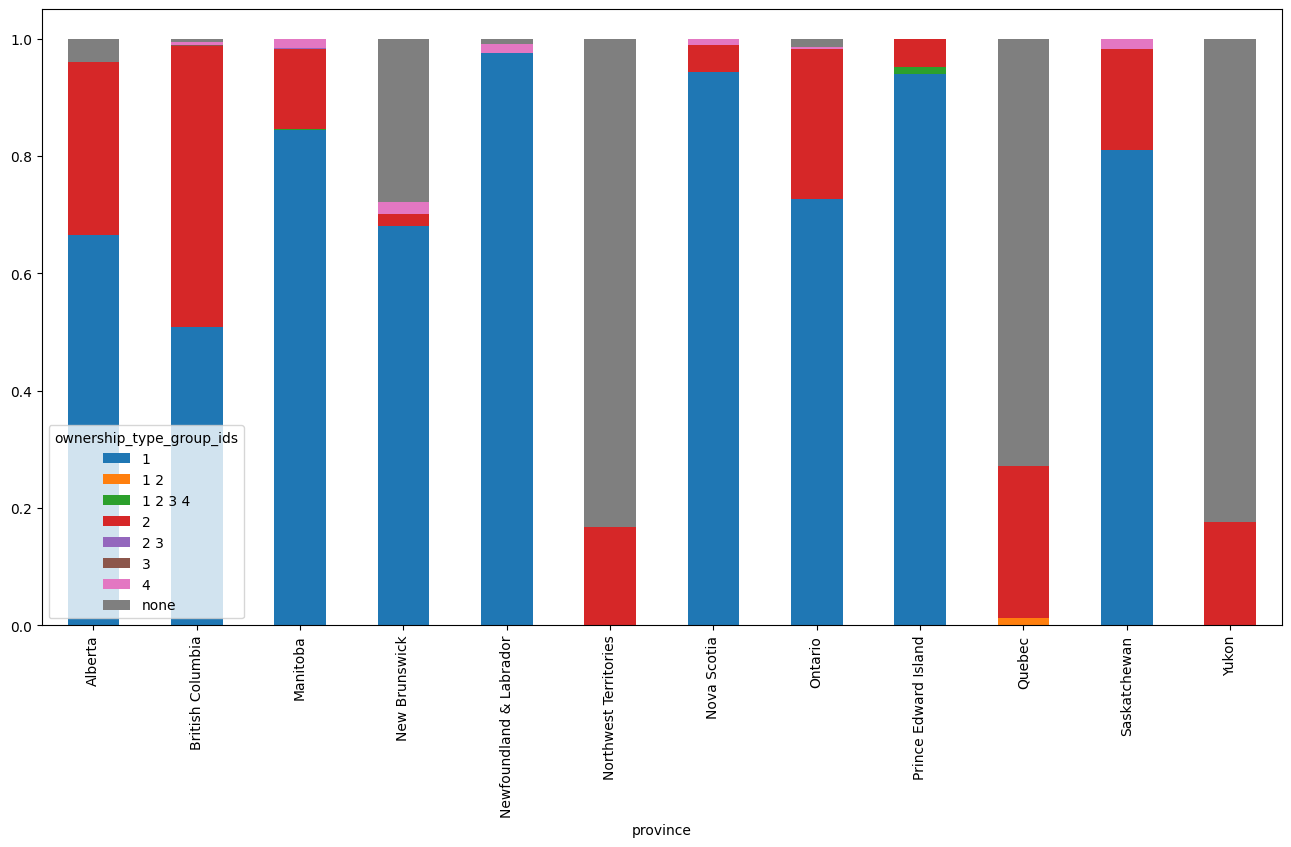

In [65]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [66]:
mask_other = ((df_bt["ownership_type_group_ids"] == "1") & (df_bt["ownership_type_group_ids"] == "2"))
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          13812
2           6679
none        2859
4             89
1 2           42
3              7
1 2 3 4        6
2 3            3
Name: count, dtype: int64

In [67]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)
df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 0: Other

/tmp/ipykernel_6678/3613108038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)


ownership_type_group_ids
1    13812
2     6679
Name: count, dtype: int64

In [68]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20491 entries, 0 to 26990
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20491 non-null  int64  
 1   id_mls                    20491 non-null  object 
 2   bathrooms_total           20491 non-null  int64  
 3   bedrooms                  20491 non-null  object 
 4   stories_total             14182 non-null  float64
 5   size_interior             12361 non-null  object 
 6   building_type             20491 non-null  object 
 7   agency_name               20491 non-null  object 
 8   agency_type               20491 non-null  object 
 9   property_type             20491 non-null  object 
 10  lng                       20491 non-null  float64
 11  lat                       20491 non-null  float64
 12  ownership_type            20491 non-null  object 
 13  ownership_type_group_ids  20491 non-null  int64  
 14  land_size  

In [69]:
df_oti_new["province"].value_counts()

province
Ontario                    10886
British Columbia            3965
Alberta                     2706
Quebec                       870
Saskatchewan                 633
Manitoba                     607
Nova Scotia                  383
New Brunswick                241
Newfoundland & Labrador      115
Prince Edward Island          81
Yukon                          3
Northwest Territories          1
Name: count, dtype: int64

In [70]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [71]:
df = df_oti_new

In [72]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6678/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    11329
True      9162
Name: count, dtype: int64

In [73]:
df.shape

(20491, 21)

In [74]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6678/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26917193,24011585,2,2 + 0,NaN,1181.0000,Apartment,EXP REALTY,Firm,Single Family,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26917193/1740-s...,638518108503430000,N9J1X7,Ontario,609900.0
1,26917150,24011582,3,4 + 0,2.0,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.272098,Freehold,1,78.31X110.47 FT,0,https://realtor.ca/real-estate/26917150/2768-l...,638518072592900000,N9E2L2,Ontario,749800.0
2,26916981,24011579,2,2 + 1,1.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.265487,Freehold,1,60.24X112.26,0,https://realtor.ca/real-estate/26916981/3291-m...,638517778522030000,N9E1Y6,Ontario,599900.0
3,26915862,24011568,3,2 + 1,1.0,1139.0000,Row / Townhouse,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.240381,Freehold,1,38.71X125',0,https://realtor.ca/real-estate/26915862/546-ro...,638516668488530000,N9G2W1,Ontario,399900.0
4,26915403,24011560,3,3 + 2,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,Single Family,...,42.100443,Freehold,1,54.99X200.98,0,https://realtor.ca/real-estate/26915403/7-mart...,638516524546900000,N9V4B7,Ontario,899900.0


In [75]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6678/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [76]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [77]:
pd.DataFrame(bed_extra).value_counts()

0
0    4158
1    3389
2    1358
3     209
4      37
5       6
6       3
7       2
Name: count, dtype: int64

In [78]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [79]:
len(bedrooms_extra)

20491

In [80]:
bedrooms_extra[:20]

['0',
 '0',
 '1',
 '1',
 '2',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '4',
 '0',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1']

In [81]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [82]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26917193,24011585,0,2,2 + 0,NaN,1181.0000,Apartment,EXP REALTY,Firm,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26917193/1740-s...,638518108503430000,N9J1X7,Ontario,609900.0
1,26917150,24011582,0,3,4 + 0,2.0,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.272098,Freehold,1,78.31X110.47 FT,0,https://realtor.ca/real-estate/26917150/2768-l...,638518072592900000,N9E2L2,Ontario,749800.0
2,26916981,24011579,1,2,2 + 1,1.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.265487,Freehold,1,60.24X112.26,0,https://realtor.ca/real-estate/26916981/3291-m...,638517778522030000,N9E1Y6,Ontario,599900.0
3,26915862,24011568,1,3,2 + 1,1.0,1139.0000,Row / Townhouse,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.240381,Freehold,1,38.71X125',0,https://realtor.ca/real-estate/26915862/546-ro...,638516668488530000,N9G2W1,Ontario,399900.0
4,26915403,24011560,2,3,3 + 2,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.100443,Freehold,1,54.99X200.98,0,https://realtor.ca/real-estate/26915403/7-mart...,638516524546900000,N9V4B7,Ontario,899900.0
7,26915091,24011559,0,1,2 + 0,1.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.125673,Freehold,1,84.41X310,0,https://realtor.ca/real-estate/26915091/89-tex...,638516452559270000,N9V2R8,Ontario,549900.0
8,26912635,24011538,0,2,2 + 0,NaN,1280.0000,Apartment,SOTHEBY'S INTERNATIONAL REALTY CANADA,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26912635/1225-r...,638515768699430000,N9A0A2,Ontario,589900.0
9,26912633,24011550,1,2,3 + 1,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.272614,Freehold,1,81.27X116.47,0,https://realtor.ca/real-estate/26912633/2705-d...,638515768684770000,N9E2M7,Ontario,579900.0
10,26912334,24011547,0,2,3 + 0,NaN,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.135757,Freehold,1,50.2X141.60 FT,0,https://realtor.ca/real-estate/26912334/168-la...,638515732710100000,N9V0A9,Ontario,649900.0
11,26911605,24011480,0,2,3 + 0,NaN,1440.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.135470,Freehold,1,76.61X167.39 FT APPROX,0,https://realtor.ca/real-estate/26911605/38-kin...,638515696791100000,N9V4A4,Ontario,701900.0


In [83]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_6678/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20491 entries, 0 to 26990
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20491 non-null  int64  
 1   id_mls                    20491 non-null  object 
 2   bedrooms_extra            20491 non-null  object 
 3   bathrooms_total           20491 non-null  int64  
 4   bedrooms                  20491 non-null  object 
 5   stories_total             14182 non-null  float64
 6   size_interior             12361 non-null  object 
 7   building_type             20491 non-null  object 
 8   agency_name               20491 non-null  object 
 9   agency_type               20491 non-null  object 
 10  property_type             20491 non-null  object 
 11  lng                       20491 non-null  float64
 12  lat                       20491 non-null  float64
 13  ownership_type            20491 non-null  object 
 14  ownership_t

In [85]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_6678/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [86]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26917193,24011585,0,2,2,NaN,1181.0000,Apartment,EXP REALTY,Firm,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26917193/1740-s...,638518108503430000,N9J1X7,Ontario,609900.0
1,26917150,24011582,0,3,4,2.0,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.272098,Freehold,1,78.31X110.47 FT,0,https://realtor.ca/real-estate/26917150/2768-l...,638518072592900000,N9E2L2,Ontario,749800.0
2,26916981,24011579,1,2,2,1.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.265487,Freehold,1,60.24X112.26,0,https://realtor.ca/real-estate/26916981/3291-m...,638517778522030000,N9E1Y6,Ontario,599900.0
3,26915862,24011568,1,3,2,1.0,1139.0000,Row / Townhouse,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.240381,Freehold,1,38.71X125',0,https://realtor.ca/real-estate/26915862/546-ro...,638516668488530000,N9G2W1,Ontario,399900.0
4,26915403,24011560,2,3,3,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.100443,Freehold,1,54.99X200.98,0,https://realtor.ca/real-estate/26915403/7-mart...,638516524546900000,N9V4B7,Ontario,899900.0
7,26915091,24011559,0,1,2,1.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.125673,Freehold,1,84.41X310,0,https://realtor.ca/real-estate/26915091/89-tex...,638516452559270000,N9V2R8,Ontario,549900.0
8,26912635,24011538,0,2,2,NaN,1280.0000,Apartment,SOTHEBY'S INTERNATIONAL REALTY CANADA,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26912635/1225-r...,638515768699430000,N9A0A2,Ontario,589900.0
9,26912633,24011550,1,2,3,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.272614,Freehold,1,81.27X116.47,0,https://realtor.ca/real-estate/26912633/2705-d...,638515768684770000,N9E2M7,Ontario,579900.0
10,26912334,24011547,0,2,3,NaN,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.135757,Freehold,1,50.2X141.60 FT,0,https://realtor.ca/real-estate/26912334/168-la...,638515732710100000,N9V0A9,Ontario,649900.0
11,26911605,24011480,0,2,3,NaN,1440.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.135470,Freehold,1,76.61X167.39 FT APPROX,0,https://realtor.ca/real-estate/26911605/38-kin...,638515696791100000,N9V4A4,Ontario,701900.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20491 entries, 0 to 26990
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20491 non-null  int64  
 1   id_mls                    20491 non-null  object 
 2   bedrooms_extra            20491 non-null  int64  
 3   bathrooms_total           20491 non-null  int64  
 4   bedrooms                  20491 non-null  int64  
 5   stories_total             14182 non-null  float64
 6   size_interior             12361 non-null  object 
 7   building_type             20491 non-null  object 
 8   agency_name               20491 non-null  object 
 9   agency_type               20491 non-null  object 
 10  property_type             20491 non-null  object 
 11  lng                       20491 non-null  float64
 12  lat                       20491 non-null  float64
 13  ownership_type            20491 non-null  object 
 14  ownership_t

In [88]:
df["province"].value_counts()

province
Ontario                    10886
British Columbia            3965
Alberta                     2706
Quebec                       870
Saskatchewan                 633
Manitoba                     607
Nova Scotia                  383
New Brunswick                241
Newfoundland & Labrador      115
Prince Edward Island          81
Yukon                          3
Northwest Territories          1
Name: count, dtype: int64

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20491 entries, 0 to 26990
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20491 non-null  int64  
 1   id_mls                    20491 non-null  object 
 2   bedrooms_extra            20491 non-null  int64  
 3   bathrooms_total           20491 non-null  int64  
 4   bedrooms                  20491 non-null  int64  
 5   stories_total             14182 non-null  float64
 6   size_interior             12361 non-null  object 
 7   building_type             20491 non-null  object 
 8   agency_name               20491 non-null  object 
 9   agency_type               20491 non-null  object 
 10  property_type             20491 non-null  object 
 11  lng                       20491 non-null  float64
 12  lat                       20491 non-null  float64
 13  ownership_type            20491 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26917193,24011585,0,2,2,NaN,1181.0000,Apartment,EXP REALTY,Firm,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26917193/1740-s...,638518108503430000,N9J1X7,Ontario,609900.0
1,26917150,24011582,0,3,4,2.0,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.272098,Freehold,1,78.31X110.47 FT,0,https://realtor.ca/real-estate/26917150/2768-l...,638518072592900000,N9E2L2,Ontario,749800.0
2,26916981,24011579,1,2,2,1.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.265487,Freehold,1,60.24X112.26,0,https://realtor.ca/real-estate/26916981/3291-m...,638517778522030000,N9E1Y6,Ontario,599900.0
3,26915862,24011568,1,3,2,1.0,1139.0000,Row / Townhouse,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.240381,Freehold,1,38.71X125',0,https://realtor.ca/real-estate/26915862/546-ro...,638516668488530000,N9G2W1,Ontario,399900.0
4,26915403,24011560,2,3,3,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.100443,Freehold,1,54.99X200.98,0,https://realtor.ca/real-estate/26915403/7-mart...,638516524546900000,N9V4B7,Ontario,899900.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00      5145
1.50       558
1.75        35
2.00      6499
2.50       159
3.00      1051
4.00       309
5.00        44
6.00        73
7.00        20
8.00        30
9.00        17
10.00       16
11.00        4
12.00       12
13.00        4
14.00       10
15.00       25
16.00       13
17.00       13
18.00        7
19.00       12
20.00       11
21.00        9
22.00        9
23.00       10
24.00        4
25.00       12
26.00        3
27.00        5
28.00        6
29.00        4
30.00        2
31.00        1
32.00        7
33.00        1
34.00        6
36.00        4
37.00        2
38.00        2
40.00        3
41.00        1
42.00        1
44.00        7
46.00        1
47.00        1
50.00        1
51.00        3
52.00        1
54.00        3
55.00        1
57.00        1
61.00        2
68.00        1
159.00       1
Name: count, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     5145
1.50      558
1.75       35
2.00     6499
2.50      159
3.00     1051
4.00      309
5.00       44
6.00       73
7.00       20
8.00       30
9.00       17
10.00      16
11.00       4
12.00      12
13.00       4
14.00      10
15.00      25
16.00      13
17.00      13
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [95]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          2913
House              2591
Row / Townhouse     668
Semi-Detached       137
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

0        https://realtor.ca/real-estate/26917193/1740-s...
8        https://realtor.ca/real-estate/26912635/1225-r...
10       https://realtor.ca/real-estate/26912334/168-la...
11       https://realtor.ca/real-estate/26911605/38-kin...
12       https://realtor.ca/real-estate/26911606/26-kin...
                               ...                        
26942    https://realtor.ca/real-estate/26912205/132-wa...
26972    https://realtor.ca/real-estate/26901922/215-42...
26980    https://realtor.ca/real-estate/26883675/131-18...
26983    https://realtor.ca/real-estate/26899902/9-8-al...
26990    https://realtor.ca/real-estate/26899872/204-12...
Name: page_url, Length: 6309, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20491 entries, 0 to 26990
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20491 non-null  int64  
 1   id_mls                    20491 non-null  object 
 2   bedrooms_extra            20491 non-null  int64  
 3   bathrooms_total           20491 non-null  int64  
 4   bedrooms                  20491 non-null  int64  
 5   stories_total             20491 non-null  float64
 6   size_interior             12361 non-null  object 
 7   building_type             20491 non-null  object 
 8   agency_name               20491 non-null  object 
 9   agency_type               20491 non-null  object 
 10  property_type             20491 non-null  object 
 11  lng                       20491 non-null  float64
 12  lat                       20491 non-null  float64
 13  ownership_type            20491 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     11454
2.00      6499
3.00      1051
1.50       558
4.00       309
2.50       159
6.00        73
5.00        44
1.75        35
8.00        30
15.00       25
7.00        20
9.00        17
10.00       16
17.00       13
16.00       13
25.00       12
19.00       12
12.00       12
20.00       11
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

124      https://realtor.ca/real-estate/26884217/801-vi...
323      https://realtor.ca/real-estate/26895718/135-pa...
467      https://realtor.ca/real-estate/26917515/931-wo...
475      https://realtor.ca/real-estate/26915035/3545-e...
477      https://realtor.ca/real-estate/26914246/3545-e...
                               ...                        
26869    https://realtor.ca/real-estate/26893309/302-60...
26900    https://realtor.ca/real-estate/26907217/7311-2...
26903    https://realtor.ca/real-estate/26902995/10611-...
26906    https://realtor.ca/real-estate/26899974/9807-9...
26927    https://realtor.ca/real-estate/26908032/204-53...
Name: page_url, Length: 1051, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec                  673
Alberta                 327
British Columbia        155
Ontario                  82
Prince Edward Island      1
Manitoba                  1
Saskatchewan              1
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

467      https://realtor.ca/real-estate/26917515/931-wo...
559      https://realtor.ca/real-estate/26908652/519-ri...
772      https://realtor.ca/real-estate/26892144/b118-2...
1304     https://realtor.ca/real-estate/26915704/20-sou...
1416     https://realtor.ca/real-estate/26902356/490-th...
                               ...                        
26842    https://realtor.ca/real-estate/26890933/202-11...
26869    https://realtor.ca/real-estate/26893309/302-60...
26927    https://realtor.ca/real-estate/26908032/204-53...
26961    https://realtor.ca/real-estate/26884086/2406-2...
26962    https://realtor.ca/real-estate/26884005/2107-2...
Name: page_url, Length: 1240, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
1        False
2        False
3        False
4        False
         ...  
26966    False
26972    False
26980    False
26983    False
26990    False
Length: 20491, dtype: bool

In [104]:
~mask_apt_storey

0        True
1        True
2        True
3        True
4        True
         ... 
26966    True
26972    True
26980    True
26983    True
26990    True
Length: 20491, dtype: bool

In [105]:
df_storey[mask_apt_storey].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 467 to 26962
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1240 non-null   int64  
 1   id_mls                    1240 non-null   object 
 2   bedrooms_extra            1240 non-null   int64  
 3   bathrooms_total           1240 non-null   int64  
 4   bedrooms                  1240 non-null   int64  
 5   stories_total             1240 non-null   float64
 6   size_interior             1171 non-null   object 
 7   building_type             1240 non-null   object 
 8   agency_name               1240 non-null   object 
 9   agency_type               1240 non-null   object 
 10  property_type             1240 non-null   object 
 11  lng                       1240 non-null   float64
 12  lat                       1240 non-null   float64
 13  ownership_type            1240 non-null   object 
 14  ownership_

In [106]:
df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [107]:
# # set storeys for all appartments to 1
# df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [108]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00    11454
2.00     6356
3.00      675
1.50      554
2.50      159
1.75       35
4.00       14
5.00        3
6.00        1
Name: count, dtype: int64

In [109]:
df_storey["stories_total"].unique()

array([1.  , 2.  , 2.5 , 1.5 , 1.75, 3.  , 4.  , 6.  , 5.  ])

In [110]:
df = df_storey

In [111]:
df["province"].value_counts()

province
Ontario                    10804
British Columbia            3810
Alberta                     2379
Saskatchewan                 632
Manitoba                     606
Nova Scotia                  383
New Brunswick                241
Quebec                       197
Newfoundland & Labrador      115
Prince Edward Island          80
Yukon                          3
Northwest Territories          1
Name: count, dtype: int64

## Handling Interior Size (Phase 1)

### First Looks

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19251 entries, 0 to 26990
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19251 non-null  int64  
 1   id_mls                    19251 non-null  object 
 2   bedrooms_extra            19251 non-null  int64  
 3   bathrooms_total           19251 non-null  int64  
 4   bedrooms                  19251 non-null  int64  
 5   stories_total             19251 non-null  float64
 6   size_interior             11190 non-null  object 
 7   building_type             19251 non-null  object 
 8   agency_name               19251 non-null  object 
 9   agency_type               19251 non-null  object 
 10  property_type             19251 non-null  object 
 11  lng                       19251 non-null  float64
 12  lat                       19251 non-null  float64
 13  ownership_type            19251 non-null  object 
 14  ownership_t

In [113]:
df["size_interior"].value_counts()

size_interior
1500.0000      26
1100.0000      24
1200 sqft      23
1200.0000      22
1400.0000      20
               ..
2594 sqft       1
1818 sqft       1
4833 sqft       1
2568.4 sqft     1
2401 sqft       1
Name: count, Length: 6340, dtype: int64

In [114]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26917193,24011585,0,2,2,1.0,1181.0000,Apartment,EXP REALTY,Firm,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26917193/1740-s...,638518108503430000,N9J1X7,Ontario,609900.0
3,26915862,24011568,1,3,2,1.0,1139.0000,Row / Townhouse,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.240381,Freehold,1,38.71X125',0,https://realtor.ca/real-estate/26915862/546-ro...,638516668488530000,N9G2W1,Ontario,399900.0
8,26912635,24011538,0,2,2,1.0,1280.0000,Apartment,SOTHEBY'S INTERNATIONAL REALTY CANADA,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26912635/1225-r...,638515768699430000,N9A0A2,Ontario,589900.0
11,26911605,24011480,0,2,3,1.0,1440.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.135470,Freehold,1,76.61X167.39 FT APPROX,0,https://realtor.ca/real-estate/26911605/38-kin...,638515696791100000,N9V4A4,Ontario,701900.0
12,26911606,24011478,0,2,3,1.0,1350.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.135738,Freehold,1,62.43X146.36 approx,0,https://realtor.ca/real-estate/26911606/26-kin...,638515696794000000,N9V4A4,Ontario,669900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26966,26906968,A2132198,0,2,3,2.0,1116 sqft,Row / Townhouse,M&M Real Estate,Firm,...,58.522062,Freehold,1,"250.33 m2|0-4,050 sqft",2,https://realtor.ca/real-estate/26906968/10342-...,638514959441730000,T0H1Z0,Alberta,99900.0
26972,26901922,15634,0,1,2,1.0,840 sqft,Apartment,RE/MAX ACTION REALTY,Firm,...,60.737361,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26901922/215-42...,638514562811900000,Y1A0H1,Yukon,449900.0
26980,26883675,15621,0,2,3,1.0,2142 sqft,Row / Townhouse,RE/MAX ACTION REALTY,Firm,...,60.776056,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26883675/131-18...,638511485162870000,Y1A0L2,Yukon,519900.0
26983,26899902,15630,0,2,2,1.0,1490 sqft,House,2% Realty Midnight Sun,Firm,...,60.623677,Condominium/Strata,2,5415 sqft,0,https://realtor.ca/real-estate/26899902/9-8-al...,638514041117400000,Y1A0L3,Yukon,739000.0


In [115]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26917193,24011585,0,2,2,1.0,1181.0000,Apartment,EXP REALTY,Firm,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26917193/1740-s...,638518108503430000,N9J1X7,Ontario,609900.0
3,26915862,24011568,1,3,2,1.0,1139.0000,Row / Townhouse,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.240381,Freehold,1,38.71X125',0,https://realtor.ca/real-estate/26915862/546-ro...,638516668488530000,N9G2W1,Ontario,399900.0
8,26912635,24011538,0,2,2,1.0,1280.0000,Apartment,SOTHEBY'S INTERNATIONAL REALTY CANADA,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26912635/1225-r...,638515768699430000,N9A0A2,Ontario,589900.0
11,26911605,24011480,0,2,3,1.0,1440.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.135470,Freehold,1,76.61X167.39 FT APPROX,0,https://realtor.ca/real-estate/26911605/38-kin...,638515696791100000,N9V4A4,Ontario,701900.0
12,26911606,24011478,0,2,3,1.0,1350.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.135738,Freehold,1,62.43X146.36 approx,0,https://realtor.ca/real-estate/26911606/26-kin...,638515696794000000,N9V4A4,Ontario,669900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17016,26898907,40589241,0,1,3,1.0,480.0000,House,"Century 21 Blue Sky Region Realty Inc., Brokerage",Firm,...,47.059016,Freehold,1,3.54 ac|2 - 4.99 acres,0,https://realtor.ca/real-estate/26898907/30-lak...,638513968101970000,P0H2H0,Ontario,385000.0
17020,26893626,40588327,1,4,4,2.0,4850.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,47.067995,Freehold,1,1.67 ac|1/2 - 1.99 acres,13,https://realtor.ca/real-estate/26893626/429-fo...,638513163921530000,P0H2H0,Ontario,2580000.0
17030,26884378,40585256,0,0,2,1.0,879.0000,House,"Century 21 Blue Sky Region Realty Inc., Brokerage",Firm,...,47.047430,Freehold,1,1.44 ac|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/26884378/14-lak...,638512041928600000,P0H2H0,Ontario,549000.0
17740,26909193,TB241315,0,2,3,1.0,1428.0000,Apartment,RE/MAX GENERATIONS REALTY,Firm,...,48.440192,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26909193/102-62...,638515543389200000,P7B7C8,Ontario,394000.0


In [116]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
21349,26908078,A2132964,1,2,2,1.0,1299 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.586003,Freehold,1,"9375 sqft|7,251 - 10,889 sqft",10,https://realtor.ca/real-estate/26908078/207-ro...,638515122331730000,T0K1H0,Alberta,194500.0
21350,26907060,A2130327,1,5,3,2.0,2710.45 sqft,House,RE/MAX real estate central alberta - Lacombe,Firm,...,49.667403,Freehold,1,4.5 ac|2 - 4.99 acres,2,https://realtor.ca/real-estate/26907060/1327-t...,638514977073630000,T0K0P0,Alberta,1375000.0
21352,26903755,A2132086,3,3,1,1.0,1483.19 sqft,House,Grassroots Realty Group,Firm,...,49.728428,Freehold,1,37.72 ac|10 - 49 acres,0,https://realtor.ca/real-estate/26903755/9205-r...,638514736620000000,T0K0P0,Alberta,1070000.0
21357,26884001,A2131506,0,2,3,1.0,1120 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.629820,Freehold,1,"5000 sqft|4,051 - 7,250 sqft",3,https://realtor.ca/real-estate/26884001/8506-1...,638511754507830000,T0K0M0,Alberta,279000.0
21359,26898880,A2132452,2,3,3,1.0,1341 sqft,House,REAL BROKER,Firm,...,49.492958,Freehold,1,"4800 sqft|4,051 - 7,250 sqft",5,https://realtor.ca/real-estate/26898880/1124-b...,638513962600400000,T0K1W0,Alberta,475000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26959,26884492,A2130718,1,4,3,2.0,1596 sqft,Semi-Detached,COLDWELL BANKER UNITED,Firm,...,56.780015,Freehold,1,"2908.82 sqft|0-4,050 sqft",2,https://realtor.ca/real-estate/26884492/217-cl...,638512064271870000,T9K2X5,Alberta,499900.0
26960,26884130,A2131507,1,4,3,2.0,2401 sqft,House,3% REALTY FORT MCMURRAY,Firm,...,56.743480,Freehold,1,"5445.79 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26884130/315-ki...,638512004141700000,T9K0R3,Alberta,785000.0
26964,26916873,A2131219,1,3,3,1.0,1247 sqft,House,RE/MAX Grande Prairie,Firm,...,58.518675,Freehold,1,"6045 sqft|4,051 - 7,250 sqft",6,https://realtor.ca/real-estate/26916873/4-bore...,638517634275300000,T0H1Z0,Alberta,339000.0
26965,26907080,A2130350,2,3,3,1.0,1396 sqft,House,RE/MAX Grande Prairie,Firm,...,58.572506,Freehold,1,12.03 ac|10 - 49 acres,10,https://realtor.ca/real-estate/26907080/19125-...,638514980447400000,T0H1Z0,Alberta,699900.0


In [117]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
11590,26917696,9965044,0,1,2,1.0,1179.72 sqft,Apartment,FLASH IMMOBILIER INC./FLASH REAL ESTATE INC.,Firm,...,45.491104,Condominium/Strata,2,1746.98 sqft,1,https://realtor.ca/real-estate/26917696/97-rue...,638518328988570000,J8V0G2,Quebec,379900.0
11595,26917549,20563006,0,1,2,1.0,942 sqft,Apartment,RE/MAX VISION,Firm,...,45.450350,Condominium/Strata,2,93.93 m2,1,https://realtor.ca/real-estate/26917549/226-bo...,638518257157500000,J8Y6L1,Quebec,249800.0
11634,26916269,23665834,0,1,2,1.0,950 sqft,Apartment,Guilbault services immobiliers inc.,Firm,...,45.523208,Condominium/Strata,2,242.49 m2,1,https://realtor.ca/real-estate/26916269/1030-c...,638517249595970000,J8M0A1,Quebec,275000.0
11670,26914803,20416941,0,1,2,1.0,1088.23 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.431513,Condominium/Strata,2,148.62 m2,1,https://realtor.ca/real-estate/26914803/93-rue...,638516385470270000,J9J0T4,Quebec,319800.0
11693,26913848,26379719,0,1,2,1.0,1067.78 sqft,Apartment,VIA CAPITALE DIAMANT,Firm,...,45.422105,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26913848/956-bo...,638515882765570000,J9J0B9,Quebec,305000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16373,26895926,12609576,0,1,1,1.0,597.4 sqft,Apartment,PÉLADEAU COURTIER IMMOBILIER AGRÉÉ,Firm,...,46.809441,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26895926/770-ru...,638513734561200000,G1R3A4,Quebec,229000.0
16423,26890668,19054637,0,1,2,1.0,1021.5 sqft,Apartment,RE/MAX ACCÈS INC. - Thetford Mines (Notre-Dam...,Firm,...,46.083340,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26890668/680-ru...,638512966940000000,G6G3V8,Quebec,179000.0
16449,26889395,15903124,0,2,3,1.0,1517.71 sqft,Row / Townhouse,FRANCISCO CABRERA,Firm,...,46.865343,Condominium/Strata,2,220 m2,1,https://realtor.ca/real-estate/26889395/5-321-...,638512531557030000,G1E0K9,Quebec,339500.0
16473,26886212,27427720,0,1,2,1.0,868.65 sqft,Apartment,GROUPE SUTTON-NOUVELLE DEMEURE,Firm,...,46.736062,Condominium/Strata,2,1817.2 m2,2,https://realtor.ca/real-estate/26886212/1158-r...,638512185922500000,G6W6Y3,Quebec,259000.0


### m2 to sqft

In [118]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_6678/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
12847,26918252,13748192,0,1,0,1.0,42.4 m2,Apartment,GROUPE SUTTON - ACTION,Firm,...,45.511066,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26918252/201-ru...,638518660628370000,H2X0B1,Quebec,319000.0
12915,26917445,24315291,0,1,1,1.0,37.63 m2,Apartment,VENDIRECT INC.,Firm,...,45.504040,Condominium/Strata,2,405 sqft,0,https://realtor.ca/real-estate/26917445/1030-r...,638518222061100000,H2Z0B8,Quebec,419800.0
14204,26892780,15567827,0,2,3,1.0,117.9 m2,Apartment,LES IMMEUBLES DIAMANT DIAMANT INC.,Firm,...,45.472510,Condominium/Strata,2,37.81 m2,1,https://realtor.ca/real-estate/26892780/299-ru...,638513110662330000,H3E0C6,Quebec,979000.0
14663,26883792,19685091,0,1,3,1.0,108.8 m2,Apartment,ROYAL LEPAGE ALTITUDE,Firm,...,45.460231,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26883792/161-ru...,638511595239430000,J3L0W4,Quebec,429800.0
16325,26900501,19202968,0,1,2,1.0,107.77 m2,Apartment,RE/MAX RÉFÉRENCE 2000,Firm,...,46.853478,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26900501/1130-r...,638514090793200000,G3K0P1,Quebec,339000.0


In [119]:
df[contains_meters]["province"].value_counts()

province
Alberta    1072
Quebec        5
Name: count, dtype: int64

In [120]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
12847,26918252,13748192,0,1,0,1.0,456.3936,Apartment,GROUPE SUTTON - ACTION,Firm,...,45.511066,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26918252/201-ru...,638518660628370000,H2X0B1,Quebec,319000.0
12915,26917445,24315291,0,1,1,1.0,405.04932,Apartment,VENDIRECT INC.,Firm,...,45.504040,Condominium/Strata,2,405 sqft,0,https://realtor.ca/real-estate/26917445/1030-r...,638518222061100000,H2Z0B8,Quebec,419800.0
14204,26892780,15567827,0,2,3,1.0,1269.0756,Apartment,LES IMMEUBLES DIAMANT DIAMANT INC.,Firm,...,45.472510,Condominium/Strata,2,37.81 m2,1,https://realtor.ca/real-estate/26892780/299-ru...,638513110662330000,H3E0C6,Quebec,979000.0
14663,26883792,19685091,0,1,3,1.0,1171.1232,Apartment,ROYAL LEPAGE ALTITUDE,Firm,...,45.460231,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26883792/161-ru...,638511595239430000,J3L0W4,Quebec,429800.0
16325,26900501,19202968,0,1,2,1.0,1160.03628,Apartment,RE/MAX RÉFÉRENCE 2000,Firm,...,46.853478,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26900501/1130-r...,638514090793200000,G3K0P1,Quebec,339000.0


In [121]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_6678/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
207,26908430,24011469,0,2,2,1.0,1510 sqft,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.404427,Freehold,1,40.25X128.34,0,https://realtor.ca/real-estate/26908430/25-dus...,638515424310270000,N7L0G7,Ontario,589900.0
260,26902508,24011317,0,3,3,1.0,2700 sqft,House,RIVERSITE REALTY INC. II Brokerage,Firm,...,42.591236,Freehold,1,70X167|under 1/2 acre,0,https://realtor.ca/real-estate/26902508/61-pha...,638514650356730000,N8A2M4,Ontario,549900.0
261,26902509,24011151,2,4,4,2.0,1795 sqft,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.407608,Freehold,1,57.02X125,0,https://realtor.ca/real-estate/26902509/125-mo...,638514650364470000,N7L5S5,Ontario,819000.0
345,26892362,24011047,0,2,4,2.0,1489 sqft,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.398470,Freehold,1,55XIRR|under 1/4 acre,0,https://realtor.ca/real-estate/26892362/14-phy...,638513066397900000,N7M3C1,Ontario,549900.0
372,26890527,24011141,0,2,4,1.0,2000 sqft,House,ROYAL LEPAGE PEIFER REALTY (DRESDEN),Firm,...,42.588848,Freehold,1,53X186,0,https://realtor.ca/real-estate/26890527/51-pin...,638512958356300000,N8A3L9,Ontario,629900.0


In [122]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           3043
Alberta                    1306
Saskatchewan                631
Manitoba                    605
Ontario                     467
Quebec                      176
New Brunswick               127
Newfoundland & Labrador     115
Yukon                         3
Northwest Territories         1
Name: count, dtype: int64

### Remove "sqft" Markdown

In [123]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
207,26908430,24011469,0,2,2,1.0,1510.0,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.404427,Freehold,1,40.25X128.34,0,https://realtor.ca/real-estate/26908430/25-dus...,638515424310270000,N7L0G7,Ontario,589900.0
260,26902508,24011317,0,3,3,1.0,2700.0,House,RIVERSITE REALTY INC. II Brokerage,Firm,...,42.591236,Freehold,1,70X167|under 1/2 acre,0,https://realtor.ca/real-estate/26902508/61-pha...,638514650356730000,N8A2M4,Ontario,549900.0
261,26902509,24011151,2,4,4,2.0,1795.0,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.407608,Freehold,1,57.02X125,0,https://realtor.ca/real-estate/26902509/125-mo...,638514650364470000,N7L5S5,Ontario,819000.0
345,26892362,24011047,0,2,4,2.0,1489.0,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.398470,Freehold,1,55XIRR|under 1/4 acre,0,https://realtor.ca/real-estate/26892362/14-phy...,638513066397900000,N7M3C1,Ontario,549900.0
372,26890527,24011141,0,2,4,1.0,2000.0,House,ROYAL LEPAGE PEIFER REALTY (DRESDEN),Firm,...,42.588848,Freehold,1,53X186,0,https://realtor.ca/real-estate/26890527/51-pin...,638512958356300000,N8A3L9,Ontario,629900.0


In [124]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19251 entries, 0 to 26990
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19251 non-null  int64  
 1   id_mls                    19251 non-null  object 
 2   bedrooms_extra            19251 non-null  int64  
 3   bathrooms_total           19251 non-null  int64  
 4   bedrooms                  19251 non-null  int64  
 5   stories_total             19251 non-null  float64
 6   size_interior             11190 non-null  object 
 7   building_type             19251 non-null  object 
 8   agency_name               19251 non-null  object 
 9   agency_type               19251 non-null  object 
 10  property_type             19251 non-null  object 
 11  lng                       19251 non-null  float64
 12  lat                       19251 non-null  float64
 13  ownership_type            19251 non-null  object 
 14  ownership_t

In [125]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19251 entries, 0 to 26990
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19251 non-null  int64  
 1   id_mls                    19251 non-null  object 
 2   bedrooms_extra            19251 non-null  int64  
 3   bathrooms_total           19251 non-null  int64  
 4   bedrooms                  19251 non-null  int64  
 5   stories_total             19251 non-null  float64
 6   size_interior             11190 non-null  float64
 7   building_type             19251 non-null  object 
 8   agency_name               19251 non-null  object 
 9   agency_type               19251 non-null  object 
 10  property_type             19251 non-null  object 
 11  lng                       19251 non-null  float64
 12  lat                       19251 non-null  float64
 13  ownership_type            19251 non-null  object 
 14  ownership_t

In [126]:
df_si["province"].value_counts()

province
Ontario                    10804
British Columbia            3810
Alberta                     2379
Saskatchewan                 632
Manitoba                     606
Nova Scotia                  383
New Brunswick                241
Quebec                       197
Newfoundland & Labrador      115
Prince Edward Island          80
Yukon                          3
Northwest Territories          1
Name: count, dtype: int64

In [127]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 7573
Nova Scotia              383
Prince Edward Island      80
Quebec                    16
British Columbia           6
Manitoba                   1
Alberta                    1
Saskatchewan               1
Name: count, dtype: int64

In [128]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           3804.0
Ontario                    3231.0
Alberta                    2378.0
Saskatchewan                631.0
Manitoba                    605.0
Quebec                      181.0
Nova Scotia                   0.0
Prince Edward Island          0.0
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Northwest Territories         NaN
Yukon                         NaN
Name: count, dtype: float64

In [129]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19251 entries, 0 to 26990
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19251 non-null  int64  
 1   id_mls                    19251 non-null  object 
 2   bedrooms_extra            19251 non-null  int64  
 3   bathrooms_total           19251 non-null  int64  
 4   bedrooms                  19251 non-null  int64  
 5   stories_total             19251 non-null  float64
 6   size_interior             11190 non-null  float64
 7   building_type             19251 non-null  object 
 8   agency_name               19251 non-null  object 
 9   agency_type               19251 non-null  object 
 10  property_type             19251 non-null  object 
 11  lng                       19251 non-null  float64
 12  lat                       19251 non-null  float64
 13  ownership_type            19251 non-null  object 
 14  ownership_t

In [131]:
df["land_size"].value_counts()

land_size
under 1/2 acre                                               1613
0                                                             876
Unknown                                                       276
under 1 acre                                                  171
1/2 - 1.99 acres                                              140
                                                             ... 
23.51 x 98.54 FT                                                1
10 x 37 M ; Irreg 40 x 16 metres                                1
40.66 x 86.3 FT ; 40.66ftx21.93ftx86.3ftx55.25ftx109.41ft       1
29.13 x 100 FT                                                  1
1080                                                            1
Name: count, Length: 10435, dtype: int64

In [132]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26917193,24011585,0,2,2,1.0,1181.0,Apartment,EXP REALTY,Firm,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26917193/1740-s...,638518108503430000,N9J1X7,Ontario,609900.0
8,26912635,24011538,0,2,2,1.0,1280.0,Apartment,SOTHEBY'S INTERNATIONAL REALTY CANADA,Firm,...,42.316250,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26912635/1225-r...,638515768699430000,N9A0A2,Ontario,589900.0
13,26911604,24011537,0,2,2,1.0,1215.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.242932,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26911604/1885-w...,638515696761300000,N9H2R8,Ontario,494900.0
15,26911227,24011532,0,2,2,1.0,1240.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.247219,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26911227/1740-a...,638515660714600000,N9J1X7,Ontario,679900.0
31,26904224,24008501,0,2,2,1.0,1004.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.245158,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26904224/5995-e...,638514760906330000,N9H2P1,Ontario,439000.0
40,26903579,24011427,0,2,2,1.0,1208.0,Apartment,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.319683,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26903579/75-riv...,638514724607570000,N9A7C4,Ontario,389900.0
50,26902764,24011370,0,2,2,1.0,NaN,Apartment,NEST REALTY INC.,Firm,...,42.248917,Condominium/Strata,2,0X|under 1/4 acre,0,https://realtor.ca/real-estate/26902764/5840-n...,638514686506770000,N9H1S3,Ontario,499000.0
55,26901731,24011235,0,2,2,1.0,940.0,Apartment,EXP REALTY,Firm,...,42.317871,Condominium/Strata,2,140X157,0,https://realtor.ca/real-estate/26901731/515-ri...,638514322461870000,N9A7C3,Ontario,499000.0
62,26898624,24011332,0,2,2,1.0,1129.0,Apartment,JUMP REALTY INC.,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26898624/2550-s...,638513933013630000,N9H2R6,Ontario,499999.0
66,26897324,24011259,0,1,1,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.319683,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26897324/75-riv...,638513860851400000,N9A7C4,Ontario,349900.0


In [133]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

0      https://realtor.ca/real-estate/26917193/1740-s...
8      https://realtor.ca/real-estate/26912635/1225-r...
13     https://realtor.ca/real-estate/26911604/1885-w...
15     https://realtor.ca/real-estate/26911227/1740-a...
31     https://realtor.ca/real-estate/26904224/5995-e...
40     https://realtor.ca/real-estate/26903579/75-riv...
50     https://realtor.ca/real-estate/26902764/5840-n...
55     https://realtor.ca/real-estate/26901731/515-ri...
62     https://realtor.ca/real-estate/26898624/2550-s...
66     https://realtor.ca/real-estate/26897324/75-riv...
67     https://realtor.ca/real-estate/26897322/2550-s...
75     https://realtor.ca/real-estate/26896292/1225-r...
92     https://realtor.ca/real-estate/26890543/150-pa...
99     https://realtor.ca/real-estate/26890315/955-ou...
158    https://realtor.ca/real-estate/26911601/315-vi...
180    https://realtor.ca/real-estate/26909980/109-ro...
245    https://realtor.ca/real-estate/26902775/6516-t...
286    https://realtor.ca/real-

In [134]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 689
under 1 acre       96
0 x 0              57
Unknown            38
under 1/2 acre     37
                 ... 
1112 sqft           1
838 sqft            1
993 sqft            1
1803 sqft           1
1080                1
Name: count, Length: 273, dtype: int64

### Set Land Size on Apartments to Zero

In [135]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26917193,24011585,0,2,2,1.0,1181.0,Apartment,EXP REALTY,Firm,...,42.247257,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26917193/1740-s...,638518108503430000,N9J1X7,Ontario,609900.0
8,26912635,24011538,0,2,2,1.0,1280.0,Apartment,SOTHEBY'S INTERNATIONAL REALTY CANADA,Firm,...,42.316250,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26912635/1225-r...,638515768699430000,N9A0A2,Ontario,589900.0
13,26911604,24011537,0,2,2,1.0,1215.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.242932,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26911604/1885-w...,638515696761300000,N9H2R8,Ontario,494900.0
15,26911227,24011532,0,2,2,1.0,1240.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.247219,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26911227/1740-a...,638515660714600000,N9J1X7,Ontario,679900.0
31,26904224,24008501,0,2,2,1.0,1004.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.245158,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26904224/5995-e...,638514760906330000,N9H2P1,Ontario,439000.0


In [136]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19251 entries, 0 to 26990
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19251 non-null  int64  
 1   id_mls                    19251 non-null  object 
 2   bedrooms_extra            19251 non-null  int64  
 3   bathrooms_total           19251 non-null  int64  
 4   bedrooms                  19251 non-null  int64  
 5   stories_total             19251 non-null  float64
 6   size_interior             11190 non-null  float64
 7   building_type             19251 non-null  object 
 8   agency_name               19251 non-null  object 
 9   agency_type               19251 non-null  object 
 10  property_type             19251 non-null  object 
 11  lng                       19251 non-null  float64
 12  lat                       19251 non-null  float64
 13  ownership_type            19251 non-null  object 
 14  ownership_t

In [137]:
df_apt_0["land_size"].value_counts()

land_size
0                                  3529
under 1/2 acre                     1576
Unknown                             238
0                                   187
1/2 - 1.99 acres                    140
                                   ... 
70 x 132 FT                           1
47.62 x 109.04 FT                     1
36.69 x 98.66 FT|under 1/2 acre       1
50 x 118 FT ; 50 X 118                1
250.33 m2|0-4,050 sqft                1
Name: count, Length: 10184, dtype: int64

In [138]:
len(df_apt_0["land_size"].unique())

10185

In [139]:
df_apt_0["land_size"].value_counts().tail()

land_size
70 x 132 FT                        1
47.62 x 109.04 FT                  1
36.69 x 98.66 FT|under 1/2 acre    1
50 x 118 FT ; 50 X 118             1
250.33 m2|0-4,050 sqft             1
Name: count, dtype: int64

In [140]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    14457
True        34
Name: count, dtype: int64

### "under 1/2 acre"

In [141]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_6678/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
0                                         3529
under 1/2 acre                            3449
Unknown                                    238
0                                          187
1/2 - 1.99 acres                           140
                                          ... 
83.47 Acre|50 - 100 acres                    1
259.14 FT   ; 3.1 Acres|2 - 4.99 acres       1
184.94 x 459.83 FT|1/2 - 1.99 acres          1
50.01 x 125.01 FT                            1
250.33 m2|0-4,050 sqft                       1
Name: count, Length: 8476, dtype: int64

### Handling/Removing Irregular Land Size

In [142]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_6678/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
176,26909986,24011491,2,2,3,1.00,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.147170,Freehold,1,890.13Xirreg,0,https://realtor.ca/real-estate/26909986/278-co...,638515588762630000,N0R1B0,Ontario,1499900.0
218,26904222,24011350,0,1,3,1.75,NaN,House,DEERBROOK REALTY INC. - 178,Firm,...,42.185572,Freehold,1,210.37Xirreg,0,https://realtor.ca/real-estate/26904222/20385-...,638514760794900000,N0P1W0,Ontario,599900.0
283,26898896,24011087,2,3,2,1.00,NaN,House,CENTURY 21 O'BRIEN INC. Brokerage,Firm,...,42.405158,Freehold,1,41.9X149 irreg|under 1/4 acre,0,https://realtor.ca/real-estate/26898896/30-ivy...,638513966359500000,N7L5R7,Ontario,779000.0
436,26885252,24011002,0,3,4,2.00,NaN,House,CENTURY 21 MAPLE CITY REALTY LTD. Brokerage,Firm,...,42.424249,Freehold,1,45.77Xirreg,0,https://realtor.ca/real-estate/26885252/35-gol...,638512130349670000,N7L4X9,Ontario,474500.0
836,26886115,X8332332,1,2,2,1.00,NaN,House,EXP REALTY,Firm,...,42.973315,Freehold,1,44.6 x 105.57 FT ; irregular,3,https://realtor.ca/real-estate/26886115/107-ri...,638512184795030000,N5W5Y9,Ontario,671000.0


In [143]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19251 entries, 0 to 26990
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19251 non-null  int64  
 1   id_mls                    19251 non-null  object 
 2   bedrooms_extra            19251 non-null  int64  
 3   bathrooms_total           19251 non-null  int64  
 4   bedrooms                  19251 non-null  int64  
 5   stories_total             19251 non-null  float64
 6   size_interior             11190 non-null  float64
 7   building_type             19251 non-null  object 
 8   agency_name               19251 non-null  object 
 9   agency_type               19251 non-null  object 
 10  property_type             19251 non-null  object 
 11  lng                       19251 non-null  float64
 12  lat                       19251 non-null  float64
 13  ownership_type            19251 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [144]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           37
Ontario                     5
Newfoundland & Labrador     2
Manitoba                    1
Northwest Territories       1
Name: count, dtype: int64

In [145]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    10799.0
British Columbia            3773.0
Manitoba                     605.0
Newfoundland & Labrador      113.0
Northwest Territories          0.0
Alberta                        NaN
New Brunswick                  NaN
Nova Scotia                    NaN
Prince Edward Island           NaN
Quebec                         NaN
Saskatchewan                   NaN
Yukon                          NaN
Name: count, dtype: float64

In [146]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19251 entries, 0 to 26990
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19251 non-null  int64  
 1   id_mls                    19251 non-null  object 
 2   bedrooms_extra            19251 non-null  int64  
 3   bathrooms_total           19251 non-null  int64  
 4   bedrooms                  19251 non-null  int64  
 5   stories_total             19251 non-null  float64
 6   size_interior             11190 non-null  float64
 7   building_type             19251 non-null  object 
 8   agency_name               19251 non-null  object 
 9   agency_type               19251 non-null  object 
 10  property_type             19251 non-null  object 
 11  lng                       19251 non-null  float64
 12  lat                       19251 non-null  float64
 13  ownership_type            19251 non-null  object 
 14  ownership_t

In [148]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147079 entries, 0 to 147078
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        147079 non-null  int64  
 1   id_mls                    147079 non-null  object 
 2   bathrooms_total           147079 non-null  float64
 3   bedrooms_extra            147079 non-null  float64
 4   bedrooms                  147079 non-null  float64
 5   stories_total             147079 non-null  float64
 6   size_interior             147079 non-null  float64
 7   building_type             147079 non-null  object 
 8   agency_name               147079 non-null  object 
 9   agency_type               147079 non-null  object 
 10  property_type             147079 non-null  object 
 11  lng                       147079 non-null  float64
 12  lat                       147079 non-null  float64
 13  ownership_type            147079 non-null  o

### Removing Price outliers from the bottom

In [149]:
df_norm = df.copy(deep=True)

In [150]:
df_norm.shape

(19251, 22)

In [151]:
df_init.shape

(147079, 22)

In [152]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [153]:
df_norm.shape

(19128, 22)

### Removing Outliers on phase 1 features

In [154]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [155]:
# NOT ALL province/building_type combinations might exist !!!

In [156]:
df_norm.shape

(15104, 22)

In [157]:
# NO MORE LOCAL OUTLIER FACTOR!

In [158]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,timestamp,price
count,15104.0,15104.0,15104.0,15104.0,15104.0,9051.0,15104.0,15104.0,15104.0,15104.0,1.510400e+04,15104.0
mean,26900870.0,0.0,2.0,3.0,1.0,1631.0,-93.0,47.0,1.0,2.0,6.385143e+17,861451.0
std,9828.0,1.0,1.0,1.0,0.0,896.0,19.0,4.0,0.0,3.0,1.541507e+12,635330.0
min,26883230.0,0.0,0.0,0.0,1.0,1.0,-135.0,42.0,1.0,0.0,6.385112e+17,59000.0
25%,26892387.0,0.0,2.0,2.0,1.0,1044.0,-114.0,44.0,1.0,0.0,6.385131e+17,499900.0
50%,26901090.0,0.0,2.0,3.0,1.0,1429.0,-80.0,45.0,1.0,2.0,6.385142e+17,709994.0
75%,26909259.0,0.0,3.0,3.0,2.0,2050.0,-79.0,49.0,2.0,4.0,6.385156e+17,1024900.0
max,26918278.0,2.0,5.0,8.0,3.0,34562.0,-53.0,61.0,2.0,12.0,6.385187e+17,13450000.0


In [159]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
size_interior               0.679978
bathrooms_total             0.600659
bedrooms                    0.435242
stories_total               0.316332
lat                         0.141613
id                         -0.041686
timestamp                  -0.046832
lng                        -0.137298
ownership_type_group_ids   -0.219694
bedrooms_extra                   NaN
parkings                         NaN
Name: price, dtype: float64

In [160]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15104 entries, 0 to 26983
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15104 non-null  float64
 1   id_mls                    15104 non-null  object 
 2   bedrooms_extra            15104 non-null  float64
 3   bathrooms_total           15104 non-null  float64
 4   bedrooms                  15104 non-null  float64
 5   stories_total             15104 non-null  float64
 6   size_interior             9051 non-null   float64
 7   building_type             15104 non-null  object 
 8   agency_name               15104 non-null  object 
 9   agency_type               15104 non-null  object 
 10  property_type             15104 non-null  object 
 11  lng                       15104 non-null  float64
 12  lat                       15104 non-null  float64
 13  ownership_type            15104 non-null  object 
 14  ownership_t

In [161]:
df = df_norm.copy(deep=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15104 entries, 0 to 26983
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15104 non-null  float64
 1   id_mls                    15104 non-null  object 
 2   bedrooms_extra            15104 non-null  float64
 3   bathrooms_total           15104 non-null  float64
 4   bedrooms                  15104 non-null  float64
 5   stories_total             15104 non-null  float64
 6   size_interior             9051 non-null   float64
 7   building_type             15104 non-null  object 
 8   agency_name               15104 non-null  object 
 9   agency_type               15104 non-null  object 
 10  property_type             15104 non-null  object 
 11  lng                       15104 non-null  float64
 12  lat                       15104 non-null  float64
 13  ownership_type            15104 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [163]:
# df = df.drop("id_mls", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15104 entries, 0 to 26983
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15104 non-null  float64
 1   id_mls                    15104 non-null  object 
 2   bedrooms_extra            15104 non-null  float64
 3   bathrooms_total           15104 non-null  float64
 4   bedrooms                  15104 non-null  float64
 5   stories_total             15104 non-null  float64
 6   size_interior             9051 non-null   float64
 7   building_type             15104 non-null  object 
 8   agency_name               15104 non-null  object 
 9   agency_type               15104 non-null  object 
 10  property_type             15104 non-null  object 
 11  lng                       15104 non-null  float64
 12  lat                       15104 non-null  float64
 13  ownership_type            15104 non-null  object 
 14  ownership_t

In [165]:
df_aug = pd.concat([df_init, df])

In [166]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162183 entries, 0 to 26983
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        162183 non-null  float64
 1   id_mls                    162183 non-null  object 
 2   bathrooms_total           162183 non-null  float64
 3   bedrooms_extra            162183 non-null  float64
 4   bedrooms                  162183 non-null  float64
 5   stories_total             162183 non-null  float64
 6   size_interior             156130 non-null  float64
 7   building_type             162183 non-null  object 
 8   agency_name               162183 non-null  object 
 9   agency_type               162183 non-null  object 
 10  property_type             162183 non-null  object 
 11  lng                       162183 non-null  float64
 12  lat                       162183 non-null  float64
 13  ownership_type            162183 non-null  object 

## Remove Duplicates once more

In [167]:
len(df_aug["id"].unique())

161963

In [168]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [169]:
df_aug.shape

(161963, 22)

In [170]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161963 entries, 0 to 26983
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        161963 non-null  float64
 1   id_mls                    161963 non-null  object 
 2   bathrooms_total           161963 non-null  float64
 3   bedrooms_extra            161963 non-null  float64
 4   bedrooms                  161963 non-null  float64
 5   stories_total             161963 non-null  float64
 6   size_interior             156011 non-null  float64
 7   building_type             161963 non-null  object 
 8   agency_name               161963 non-null  object 
 9   agency_type               161963 non-null  object 
 10  property_type             161963 non-null  object 
 11  lng                       161963 non-null  float64
 12  lat                       161963 non-null  float64
 13  ownership_type            161963 non-null  object 

In [171]:
df_aug["province"].value_counts()

province
Ontario                    78290
British Columbia           35375
Alberta                    22377
Quebec                      9073
Saskatchewan                6260
Manitoba                    4829
Nova Scotia                 2679
New Brunswick               1799
Prince Edward Island         561
Newfoundland & Labrador      542
Yukon                        121
Northwest Territories         57
Name: count, dtype: int64

# Save to CSV (to be continued)

In [172]:
df_aug["id"] = df_aug["id"].astype(int)
df_aug.to_csv("data/aug/data-aug-2024-05-21.csv", index=False)